# Business Statement

**HELP International is an international humanitarian NGO** that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

`After the recent funding programmes, they have been able to raise around` $10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

 

` And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country.` Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

# Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

 

- Start off with the necessary data inspection and `EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.`

- `Outlier Analysis:` You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.

- Try both `K-means and Hierarchical clustering(both single and complete linkage)` on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - **[gdpp, child_mort and income]** vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

- Also, you need to `perform visualisations on the clusters that have been formed`.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 

- Both `K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.)` Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you `report back at least 5 countries which are in direst need of aid from the analysis work that you perform.`

## Data Dictionary


- **country:**	Name of the country
- **child_mort:**	Death of children under 5 years of age per 1000 live births
- **exports:**	Exports of goods and services per capita. Given as %age of the GDP per capita
- **health:**	Total health spending per capita. Given as %age of GDP per capita
- **imports:**	Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income:**	Net income per person
- **Inflation:**	The measurement of the annual growth rate of the Total GDP
- **life_expec:**	The average number of years a new born child would live if the current mortality patterns are to remain the same
- **total_fer:**	The number of children that would be born to each woman if the current age-fertility -rates remain the same
- **gdpp:**	The GDP per capita. Calculated as the Total GDP divided by the total population.

## Importing and Understanding Dataset

In [312]:
# Import required library for modelling and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import modelling library for KMeans clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import scalling library

from sklearn.preprocessing import StandardScaler

# Import modelling library for hierarchical clustering

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

# Import library for suppress warnings

import warnings
warnings.filterwarnings('ignore')


In [313]:
# Adjusting views of dataset 

# Setting the max rows to display

pd.set_option('display.max_rows',500)

# Setting max columns to display

pd.set_option('display.max_columns',500)

In [314]:
# Importing country dataset into dataframe

# Path for the dataset is G:\SAGNIK GHOSH\Machine Learning\Clustering\Country-data.csv

country_df=pd.read_csv(r'G:\SAGNIK GHOSH\Machine Learning\Clustering\Country-data.csv')

# Checking first 5 rows

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [315]:
# Checking the shape of dataset

country_df.shape

(167, 10)

- The dataset is having **`167` rows** and **`10` columns**

In [316]:
# Checking the dataset summary,datatypes

country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- The dataset is having **7 float columns**, **2 integer columns** and one **object column**

In [317]:
# Ckecking the dataset summary with mean,median,standard daviation,data count etc. for numerical columns

country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Renaming Columns

- Renaming below columns for better understanding
    - child_mort
    - life_expec
    - total_fer

In [318]:
# Renaming the columns child_mort,life_expec_total_fer for better understanding of data 

country_df.rename(columns={'child_mort':'child mortality','life_expec':'life expectancy','total_fer':'total fertility'},inplace=True)

### Null value and Duplicate Analysis

In [319]:
# Null value/Null Value percentage analysis

round((country_df.isnull().sum()/country_df.shape[0])*100,2)

country            0.0
child mortality    0.0
exports            0.0
health             0.0
imports            0.0
income             0.0
inflation          0.0
life expectancy    0.0
total fertility    0.0
gdpp               0.0
dtype: float64

- From the above result we can see there is **no null values** in any columns

#### Duplicate and redundant value analysis

In [320]:
# Duplicate data analysis to see whether dataset contain duplicate data

sum(country_df.duplicated(subset='country'))

0

- There is **no duplicate entries** found in any columns in the given dataset

In [321]:
# checking for other reducdancy in data like spelling mistake on categorical column country

print(country_df.country.unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

- There are **no redundant** entries exist in coluntry column

### Converting %Percentage value to actual values for below columns

- exports
- health
- imports

In [322]:
# Coverting the columns Imports,Exports and health from percentage (%) tto actual value for better understanding of data

pecent_col=['imports','exports','health']

# Conerting to actual values form percentage

country_df[pecent_col]=country_df[pecent_col].apply(lambda x :(x/100) * (country_df['gdpp']))

# Checking the data set after conversion

country_df.head()


,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis (EDA)

- Univariate Analysys
- Bivariate Analysis

### Univariate Analysis:

#### Data Distribution

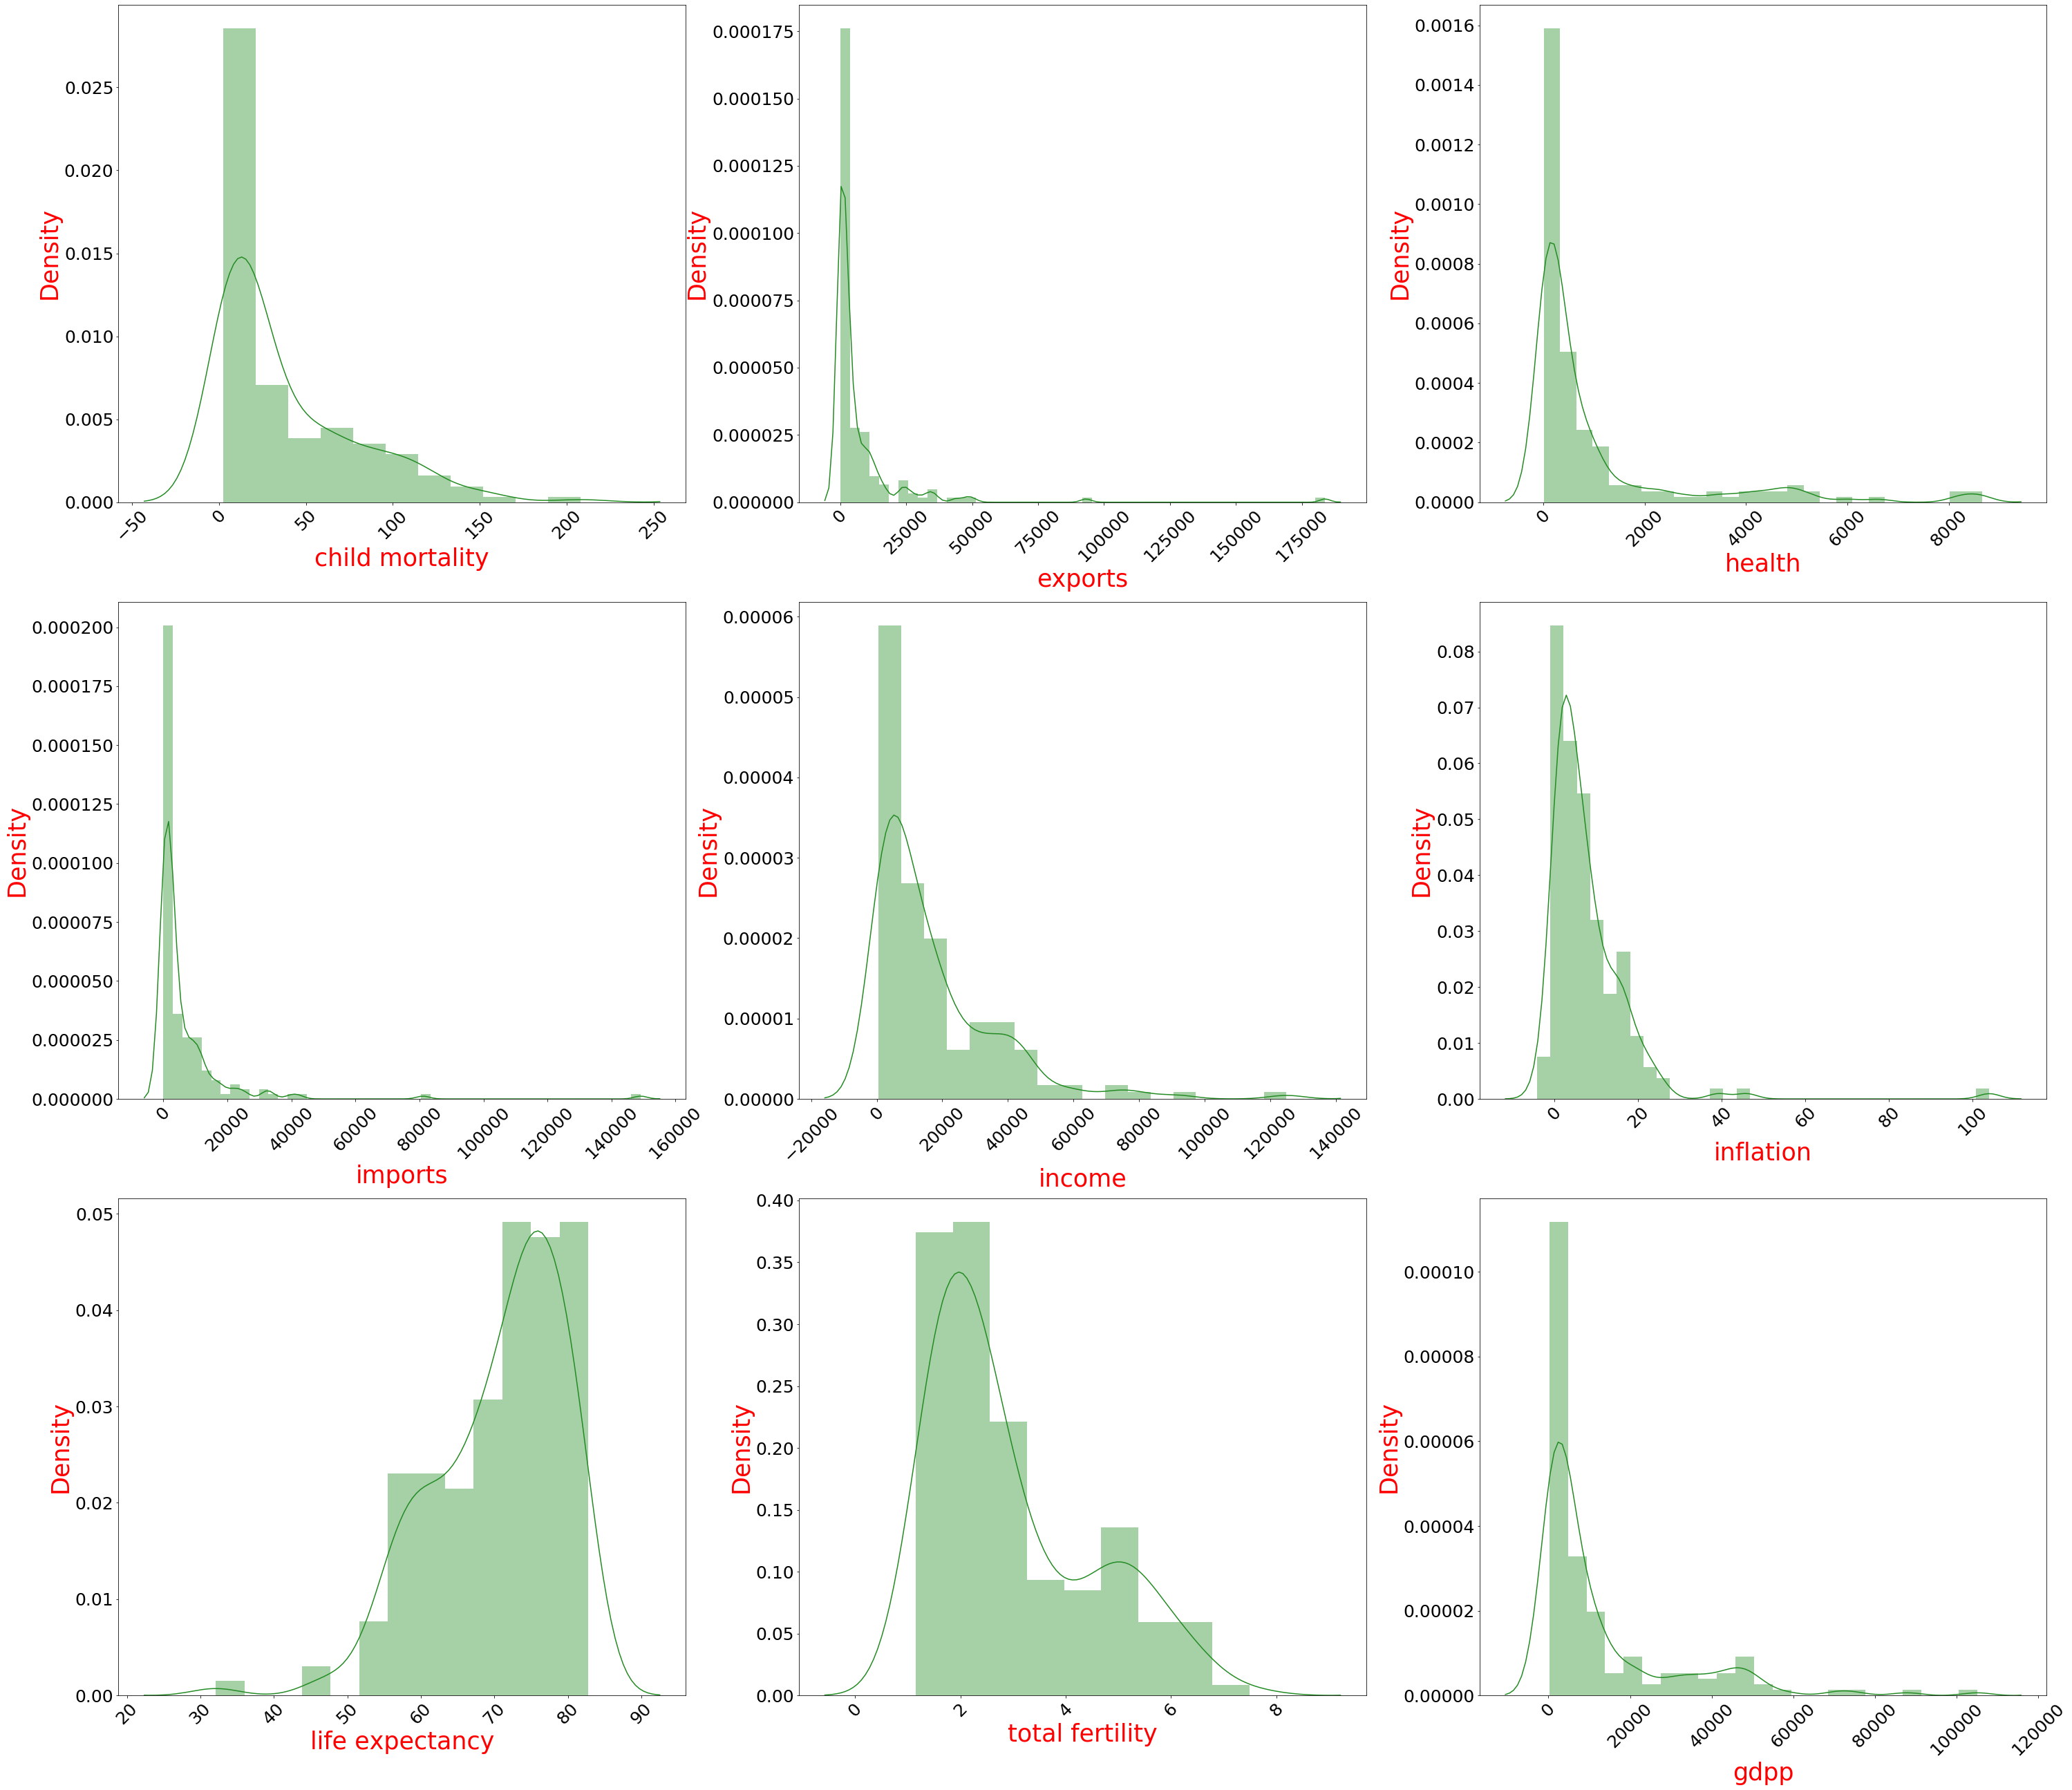

In [323]:
# Perform EDA
# Univariate analysis
# Ploting distribution of different nuerical columns spread accross different countries  to derive some insights from it

# Formatting figure size

plt.figure(figsize=(50,45))

# Ploting subplots for showing the different distribution of the different columns accross countries

for columns in enumerate(country_df.columns[1:]):

  # Initialize the subplots

    plt.subplot(3,3,columns[0]+1)

  # Ploting distribution plots

    sns.distplot(country_df[columns[1]],color='forestgreen')

  # Formating the plots
    plt.xticks(fontsize=25,rotation=45)
    plt.yticks(fontsize=25)
    plt.ylabel('Density',fontsize=35,color='red')
    plt.xlabel(columns[1],fontsize=35,color='red')

# Showing the distribution plots

plt.show()


#### Inference:

- From the above plot we can see that none of the features are following `normal distribution`.

- We will get further insite from the above feature during further **EDA and clustering analysis.**

### Outlier Analysis

In [324]:
# Outlier analysis 

# Formatting figure size

# Creating the custom function for box plot

def features_boxplot():
    
    plt.figure(figsize=(30,29))

# Ploting subplots for analyzing the outliers of  different columns accross countries

    for columns in enumerate(country_df.columns[1:]):

  # Initialize the subplots

        plt.subplot(3,3,columns[0]+1)

  # Ploting box plots

        sns.boxplot(country_df[columns[1]])

  # Formating the plots

        plt.xticks(fontsize=18,rotation=45)
        plt.xlabel(columns[1],fontsize=25,color='red')

# Showing the box plots

    plt.show()

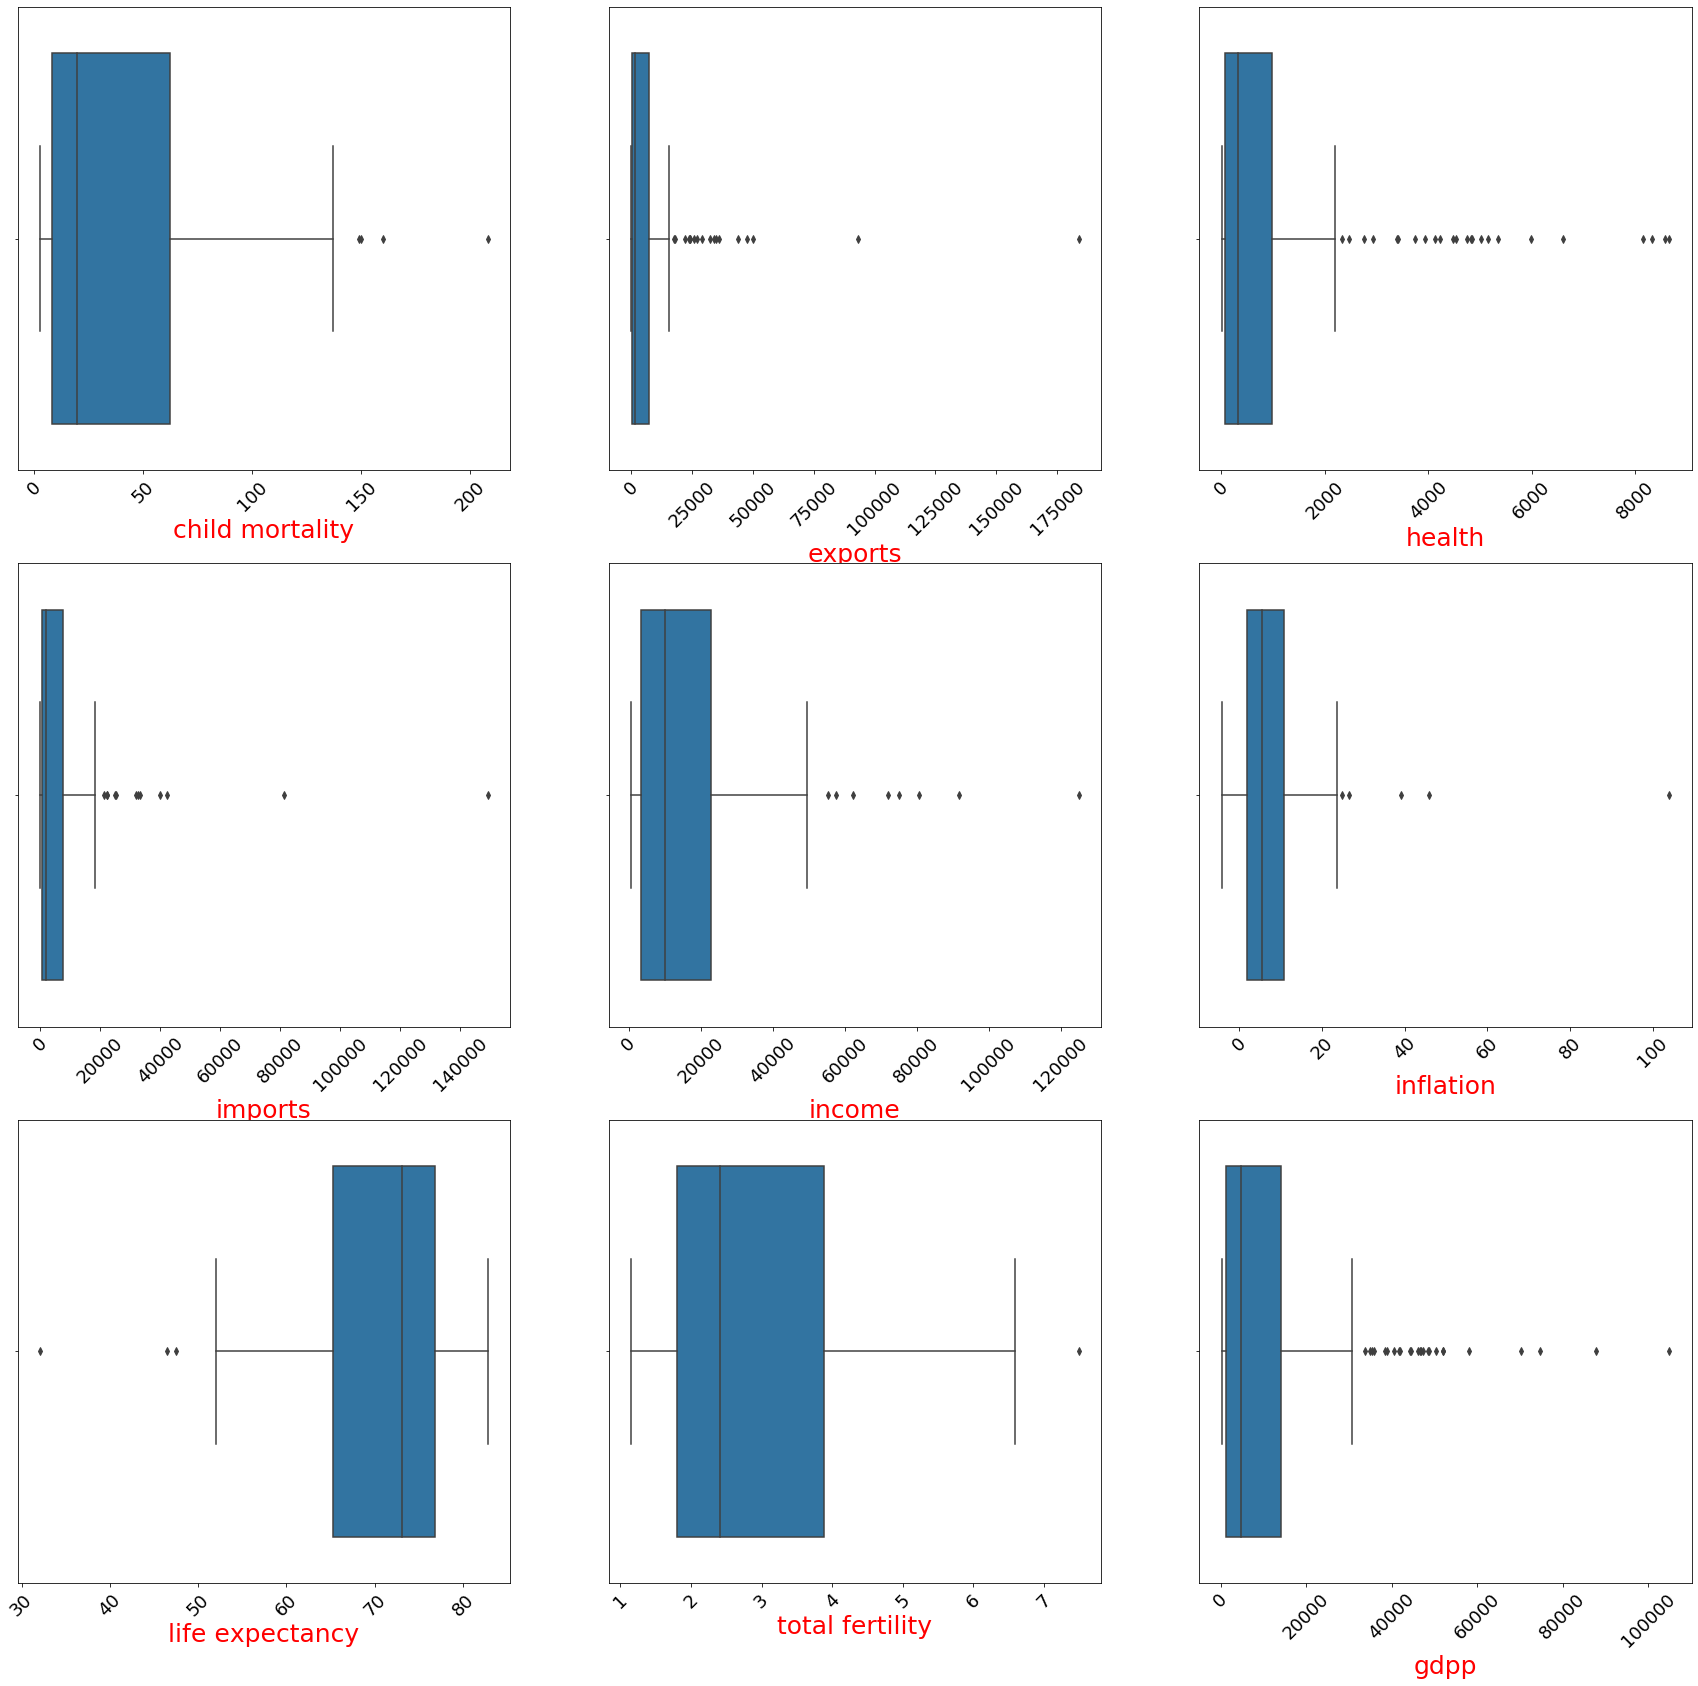

In [325]:
# Calling the custom box plot fucnction for outlier analysis

features_boxplot()

#### Inference:



- The **`child mortality`** rate, also under-five mortality rate, refers to the probability of dying between birth and exactly five years of age. From above box plot of child mortality column, we can see that few outliers exist above upper whisker (`95%` value). That means **for some countries the child mortality is extreme high and needs to be consider for aids. Hence, we will not perform any outlier tratement for this column.**


- The **`inflation`** column represents measurement of the annual growth rate of the GDP deflator. More precisely, it signifies a general increase in prices and fall in the purchasing value of money. From above box plot of inflation column, we can see that few outliers exist above upper whisker (`95%` value). That means **for some countries inflation is extreme high and needs to be consider for aids. Hence, we will not perform any outlier tratement for this column.**



- The **`life expectancy`** column signifies the average number of years a new born child would live. From above box plot of life expectancy column, we can see that few outliers exist below lower whisker (`5%` value). That means **for some countries life expectancy is extreme low and needs to be consider for aids. Hence, we will not perform any outlier tratement for this column.**



- **`Outlier Treatement:`** For rest of the columns like `imports`, `health`, `exports`, `income` etc., we can see that outliers exists above the upper whister (`95%` value). That means those countries do not need any aid. Hence, we will **perform outlier treatement** on those columns.

### Bivariate Analysis:

In [326]:
# Custom function for Bivariate analysis for top 10 or bottom 10 features depending on features that will be considered for aid

# Creting cutom function for bivariate analysis

def bivariate_analysis_features(col1_x,col2_y,ascending_flag):

  # setting figure size

    plt.figure(figsize=(8,6))

  # Sorting the country based on features

    top_bottom_10_feature=country_df[[col1_x,col2_y]].sort_values(by=col2_y,ascending=ascending_flag).head(10)

  # Ploting the bar plot

    sns.barplot(x=top_bottom_10_feature[col1_x],y=top_bottom_10_feature[col2_y])

  # Formating the plot
    plt.xticks(rotation=90,fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel(col2_y.title(),fontsize=16,color='red',labelpad=20)
    plt.xlabel(col1_x.title(),fontsize=16,color='red',labelpad=20)
    plt.title('Bar plot '+col1_x.title()+' vs '+col2_y.title(),pad=25,color='red',fontsize=16)

  # Showing the bar plot

    plt.show()


#### country vs. child mortality analysis

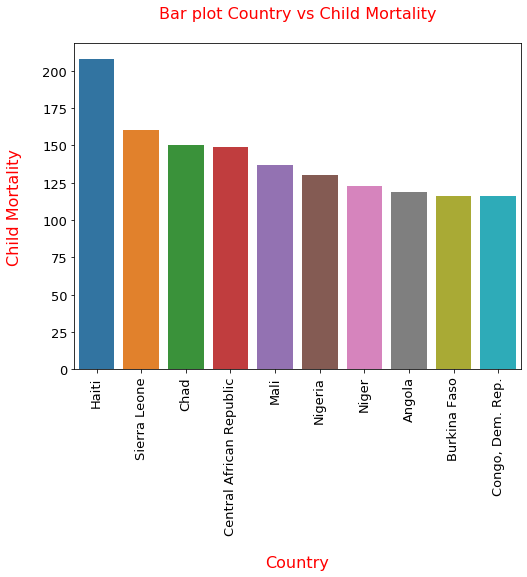

In [327]:
# Bivariate analysis between country and child mortality rate 

# Calling the custom function for analysis

bivariate_analysis_features('country','child mortality',False)

#### Inference:

- From the above bar plot between `Country vs. Child Mortality`, we can see that country **Haiti**, situated in continent North America has the `highest child mortality rate` followed by **Sierra Leone**, **Chad**, **Central African Republic**, **Mali**.


- Hence, based on child mortality rate, we can say that `these top 5 countries can be considered for HELP International NGO aid`.

#### country vs. inflation analysis

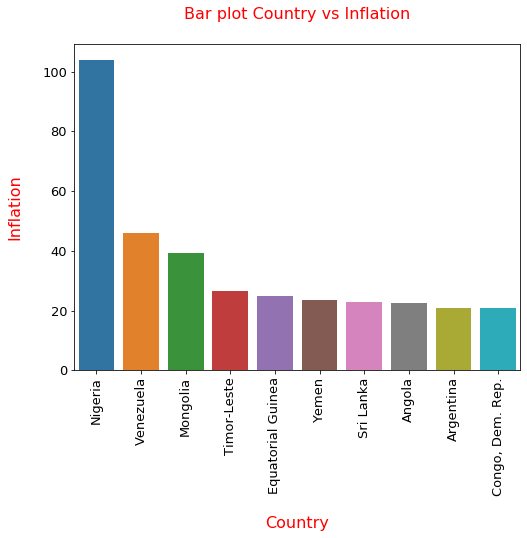

In [328]:
# Bivariate analysis between country and inflation rate 

# Calling the custom function for analysis

bivariate_analysis_features('country','inflation',False)

#### Inference:

- From the above bar plot between `Country vs. Inflation`, we can see that country **Nigeria**, situated in continent Africa has the `highest inflation` followed by **Venezuela**, **Mongolia**, **Timor-Leste**, **Equatorial Guinea**.


- Hence, based on inflation, we can say that `these top 5 countries can be considered for HELP International NGO aid`.

#### country vs. life expectancy analysis

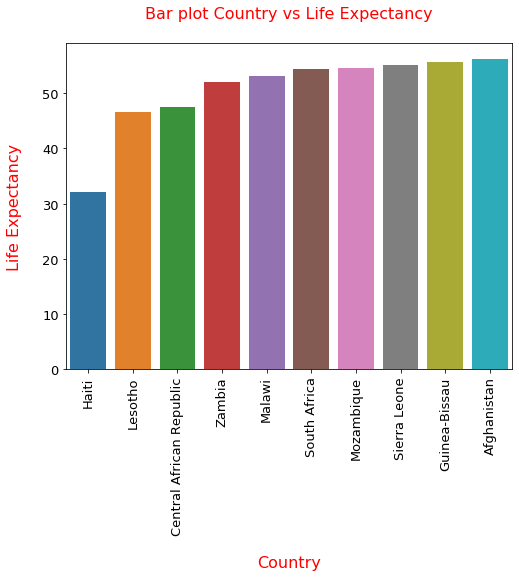

In [329]:
# Bivariate analysis between country and life expectancy

# Calling the custom function for analysis

bivariate_analysis_features('country','life expectancy',True)

#### Inference:

- From the above bar plot between `Country vs. Life Expectancy`, we can see that country **Haiti**, situated in continent North America has the `lowest life expectancy` followed by **Lesotho**, **Central African Republic**, **Zambia**, **Malawi**.


- From the `Country vs. Child Mortality` bar plot, we already saw that country **Haiti** has the `highest child mortality rate`. So, **Haiti** can strongly be considered for NGO aid.


- Hence, based on Life expectancy, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. exports analysis

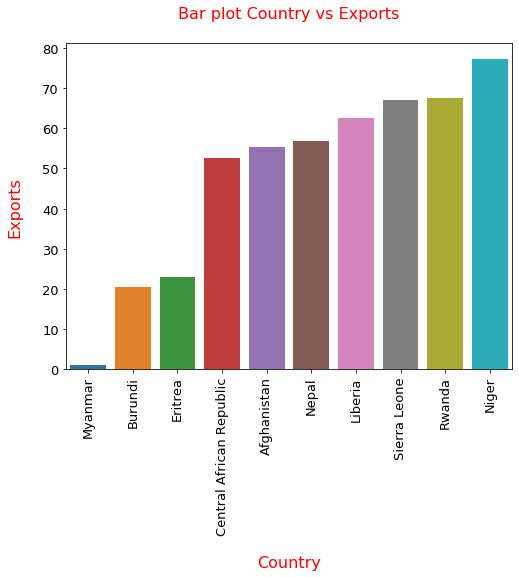

In [330]:
# Bivariate analysis between country and exports

# Calling the custom function for analysis

bivariate_analysis_features('country','exports',True)

#### Inference:

- From the above bar plot between `Country vs. Exports`, we can see that country **Myanmar**, situated in continent Asia has the `lowest exports of goods and services` followed by **Burundi**, **Eritrea**, **Central African Republic**, **Afghanistan**.


- Hence, based on exports, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. health analysis

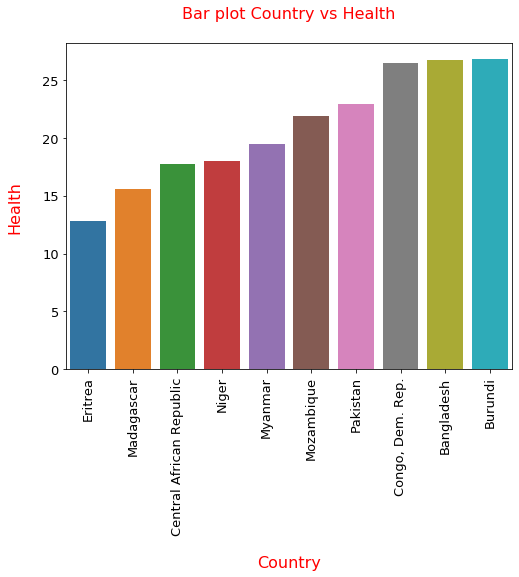

In [331]:
# Bivariate analysis between country and health

# Calling the custom function for analysis

bivariate_analysis_features('country','health',True)

#### Inference:

- From the above bar plot between `Country vs. Health`, we can see that country **Eritrea**, situated in continent Africa spend `lowest amount on health` followed by **Madagascar**, **Central African Republic**, **Niger**, **Myanmar**.


- From the `Country vs. Exports` bar plot, we already saw that country **Myanmar** has the `lowest exports of goods and services`. So, **Myanmar** can strongly be considered for NGO aid.


- Hence, based on Health spend, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. imports analysis

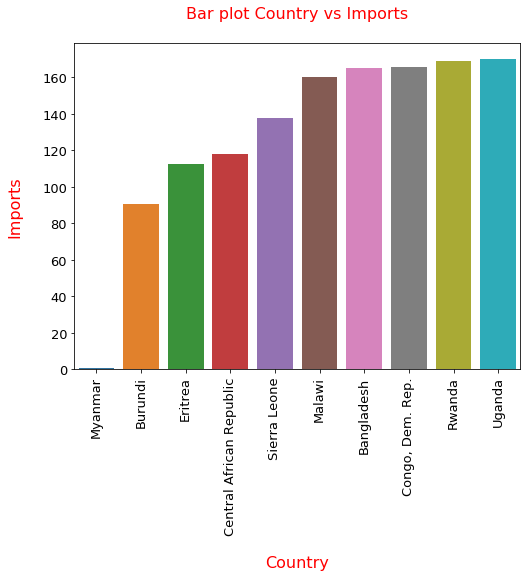

In [332]:
# Bivariate analysis between country and imports

# Calling the custom function for analysis

bivariate_analysis_features('country','imports',True)

#### Inference:

- From the above bar plot between `Country vs. Imports`, we can see that country **Myanmar**, situated in continent Asia has `lowest imports of goods and services` followed by **Burundi**, **Eritrea**, **Central African Republic**, **Sierra Leone**.


- From the `Country vs. Exports` and `Country vs. Health` bar plots, we already saw that country **Myanmar** has the `lowest exports of goods and services` as well as it `spends low on health`. So, **Myanmar** can strongly be considered for NGO aid.


- Hence, based on Imports spend, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. income analysis

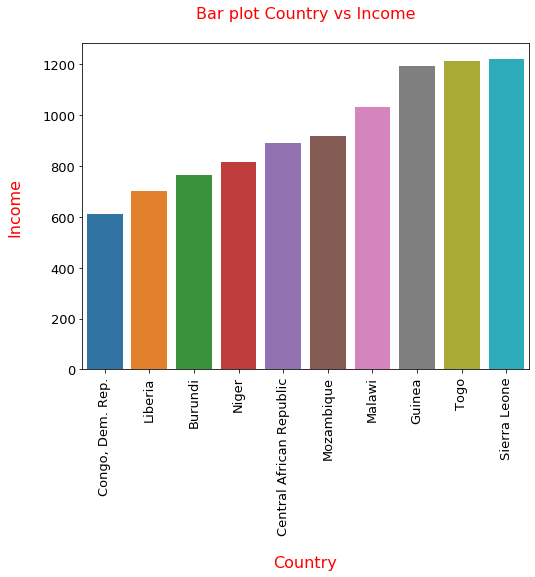

In [333]:
# Bivariate analysis between country and income

# Calling the custom function for analysis

bivariate_analysis_features('country','income',True)

#### Inference:

- From the above bar plot between `Country vs. Income`, we can see that country **Congo, Dem. Rep.**, situated in continent Africa has `lowest net income per person` followed by **Liberia**, **Burundi**, **Niger**, **Central African Republic**.


- Hence, based on income per person, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. total fertility analysis

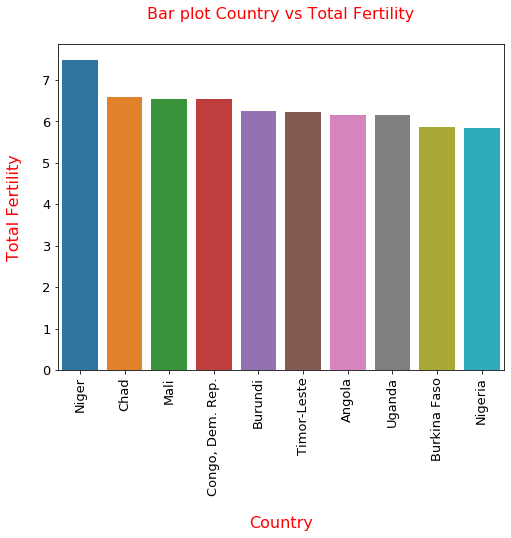

In [334]:
# Bivariate analysis between country and total fertility

# Calling the custom function for analysis

bivariate_analysis_features('country','total fertility',False)

#### Inference:

- From the above bar plot between `Country vs. Total Fertility`, we can see that country **Niger**, situated in continent Africa has `highest fertility rate` followed by **Chad**, **Mali**, **Congo, Dem. Rep.**, **Burundi**.


- From the `Country vs. Income` and `Country vs. Health` bar plots, we already saw that country **Niger** has the `low income per person` as well as it `spends low on health`. So, **Niger** can strongly be considered for NGO aid.


- Hence, based on total fertility rate, we can say that `these top 5 countries can be considered for HELP International NGO aid`.

#### country vs. gdpp analysis

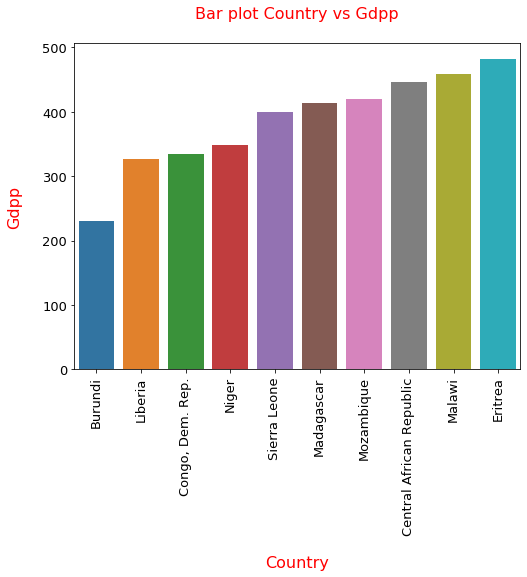

In [335]:
# Bivariate analysis between country and gdpp

# Calling the custom function for analysis

bivariate_analysis_features('country','gdpp',True)

#### Inference:

- From the above bar plot between `Country vs. Gdpp`, we can see that country **Burundi**, situated in continent Africa has `lowest gdpp per capita` followed by **Liberia**, **Congo, Dem. Rep.**, **Niger**, **Sierra Leone**.


- From the `Country vs. Total Income` , `Country vs. Imports`, `Country vs. Exports`, `Country vs. Total Fertility` bar plots, we already saw that country **Burundi** has the `low income per person` and it has `low imports and exports of goods and services`, as well as, having `high fertility rate`. So, **Burundi** can strongly be considered for NGO aid.


- Hence, based on gdpp per capita, we can say that `these least 5 countries can be considered for HELP International NGO aid`.



- From the above **Bivariate analysis**, we can conclude that, **African countries** `can be considered mostly for NGO aid`.

- We will further study these trends in **Clustering**.

### Pair Plot analysis for all Numerical features 

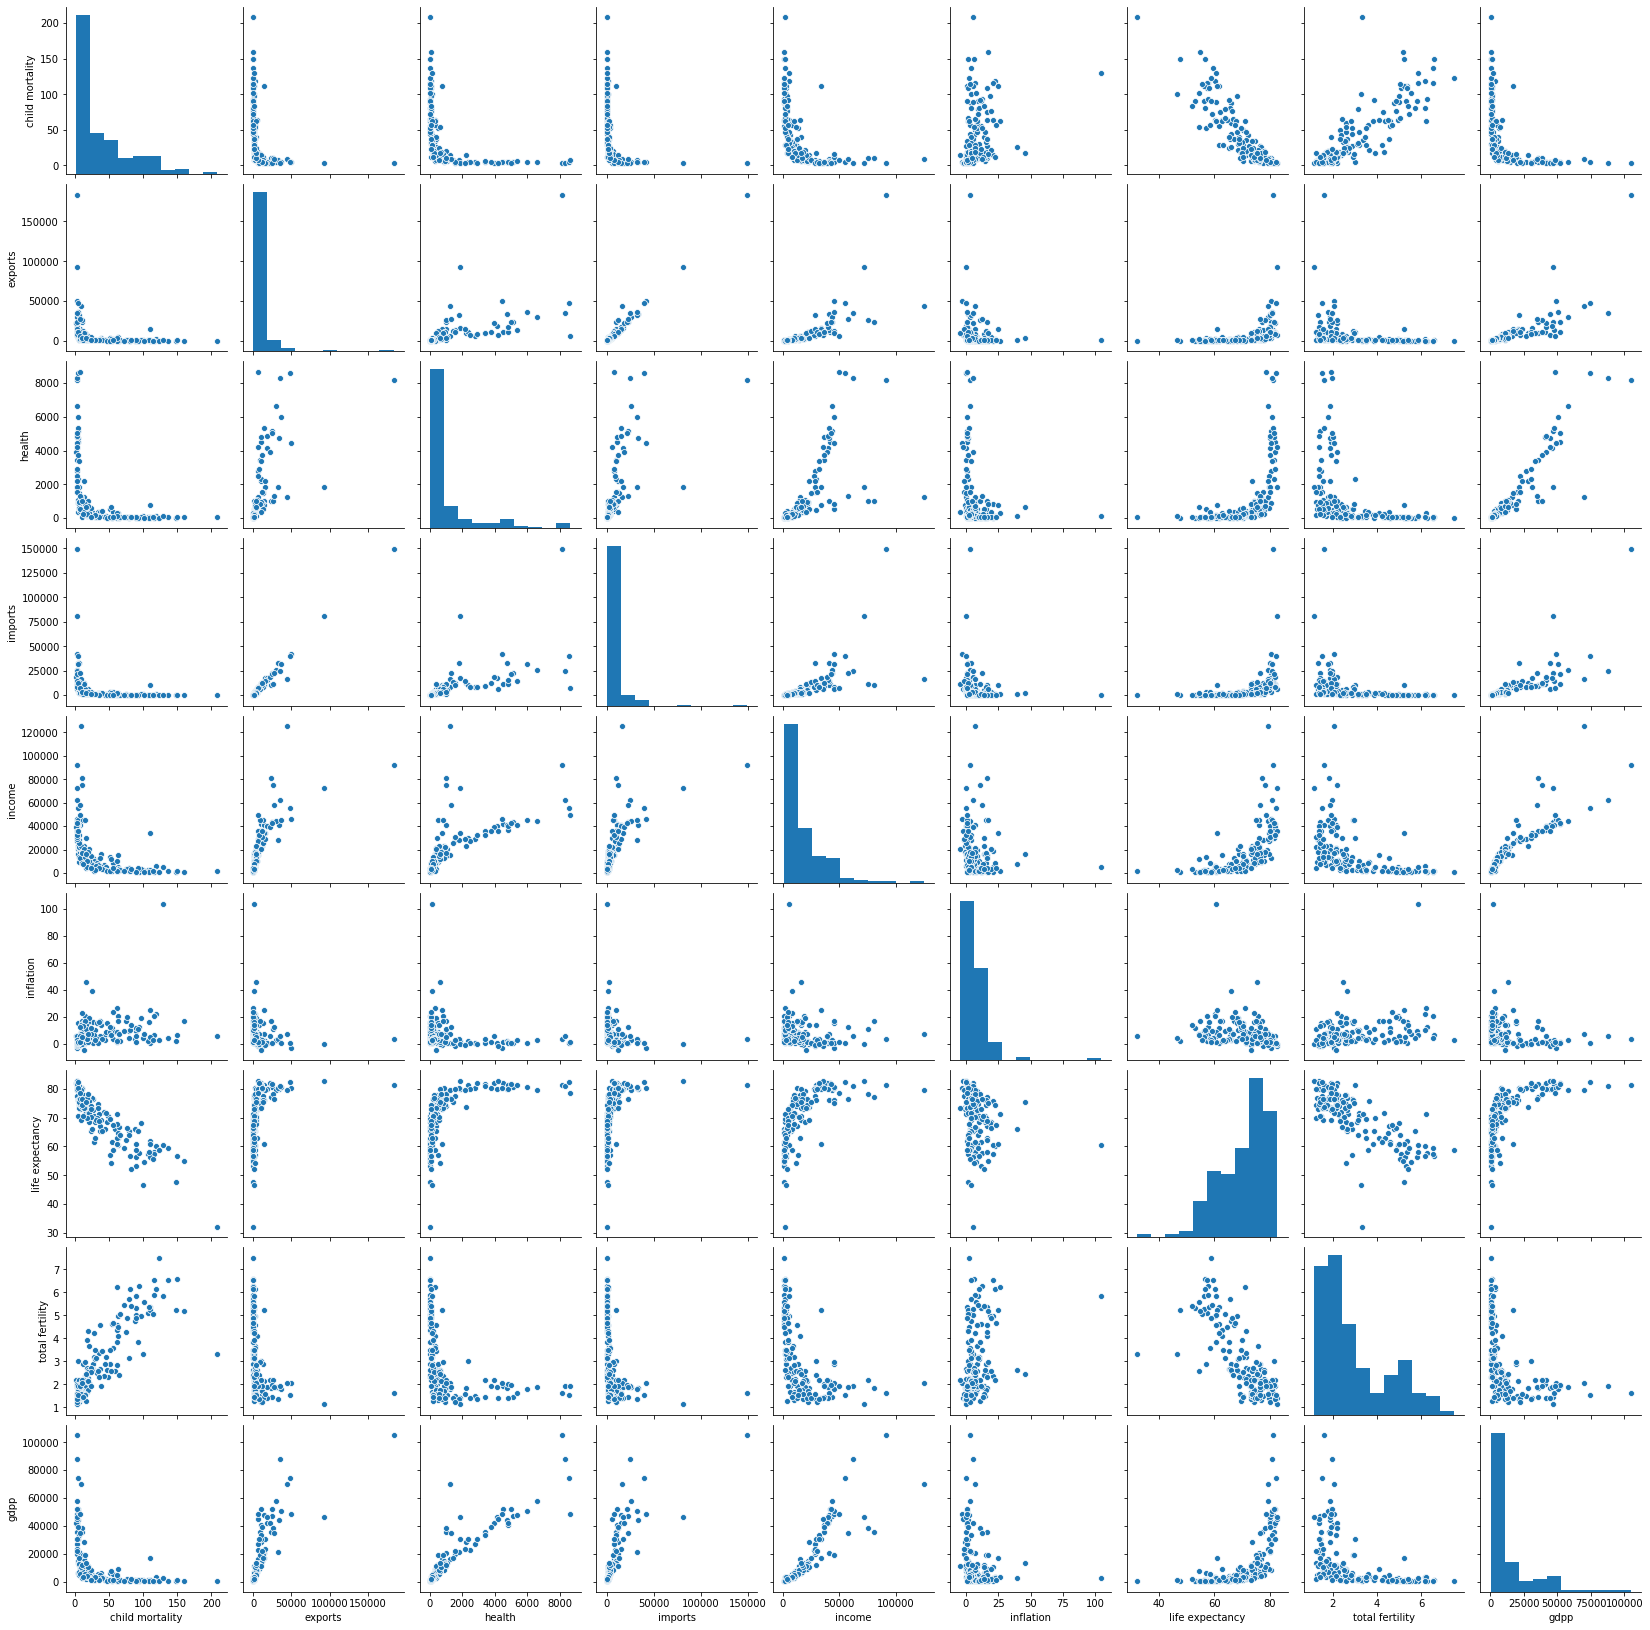

In [336]:
# Ploting the pair plot for all numerical features

# ploting pair plot

sns.pairplot(country_df)

# showing the plot

plt.show()

#### Inference:

- Though `Pairplot` is not required for clustering as parameter `correlation is not an issue for clustering model`, I have performed the analysis just to understand the features better. 


- These plot provides understanding of how each feature impacts another which `inturn will be critical when taking decisions for top countries to be considered for NGO aids`.

## Data Preparation

- Outlier treatement
- Scalling

### Outlier treatement 

In [337]:
# Outlier treatement 

# Columns that need outlier treatement are store into a list

outlier_treat=['exports','health','imports','income','gdpp','total fertility']

# perform soft capping for 0.99 quantile

# Looping through the columns for outlier treatement

for col_outlier in outlier_treat:

  # Calculating the 99th percentile for each features

  upper_qunatile=country_df[col_outlier].quantile(0.99)

  # Capping the outliers for ablove mentioned features into its 99% if the data points in greater than 99%

  country_df[col_outlier][country_df[col_outlier]>=upper_qunatile]=upper_qunatile


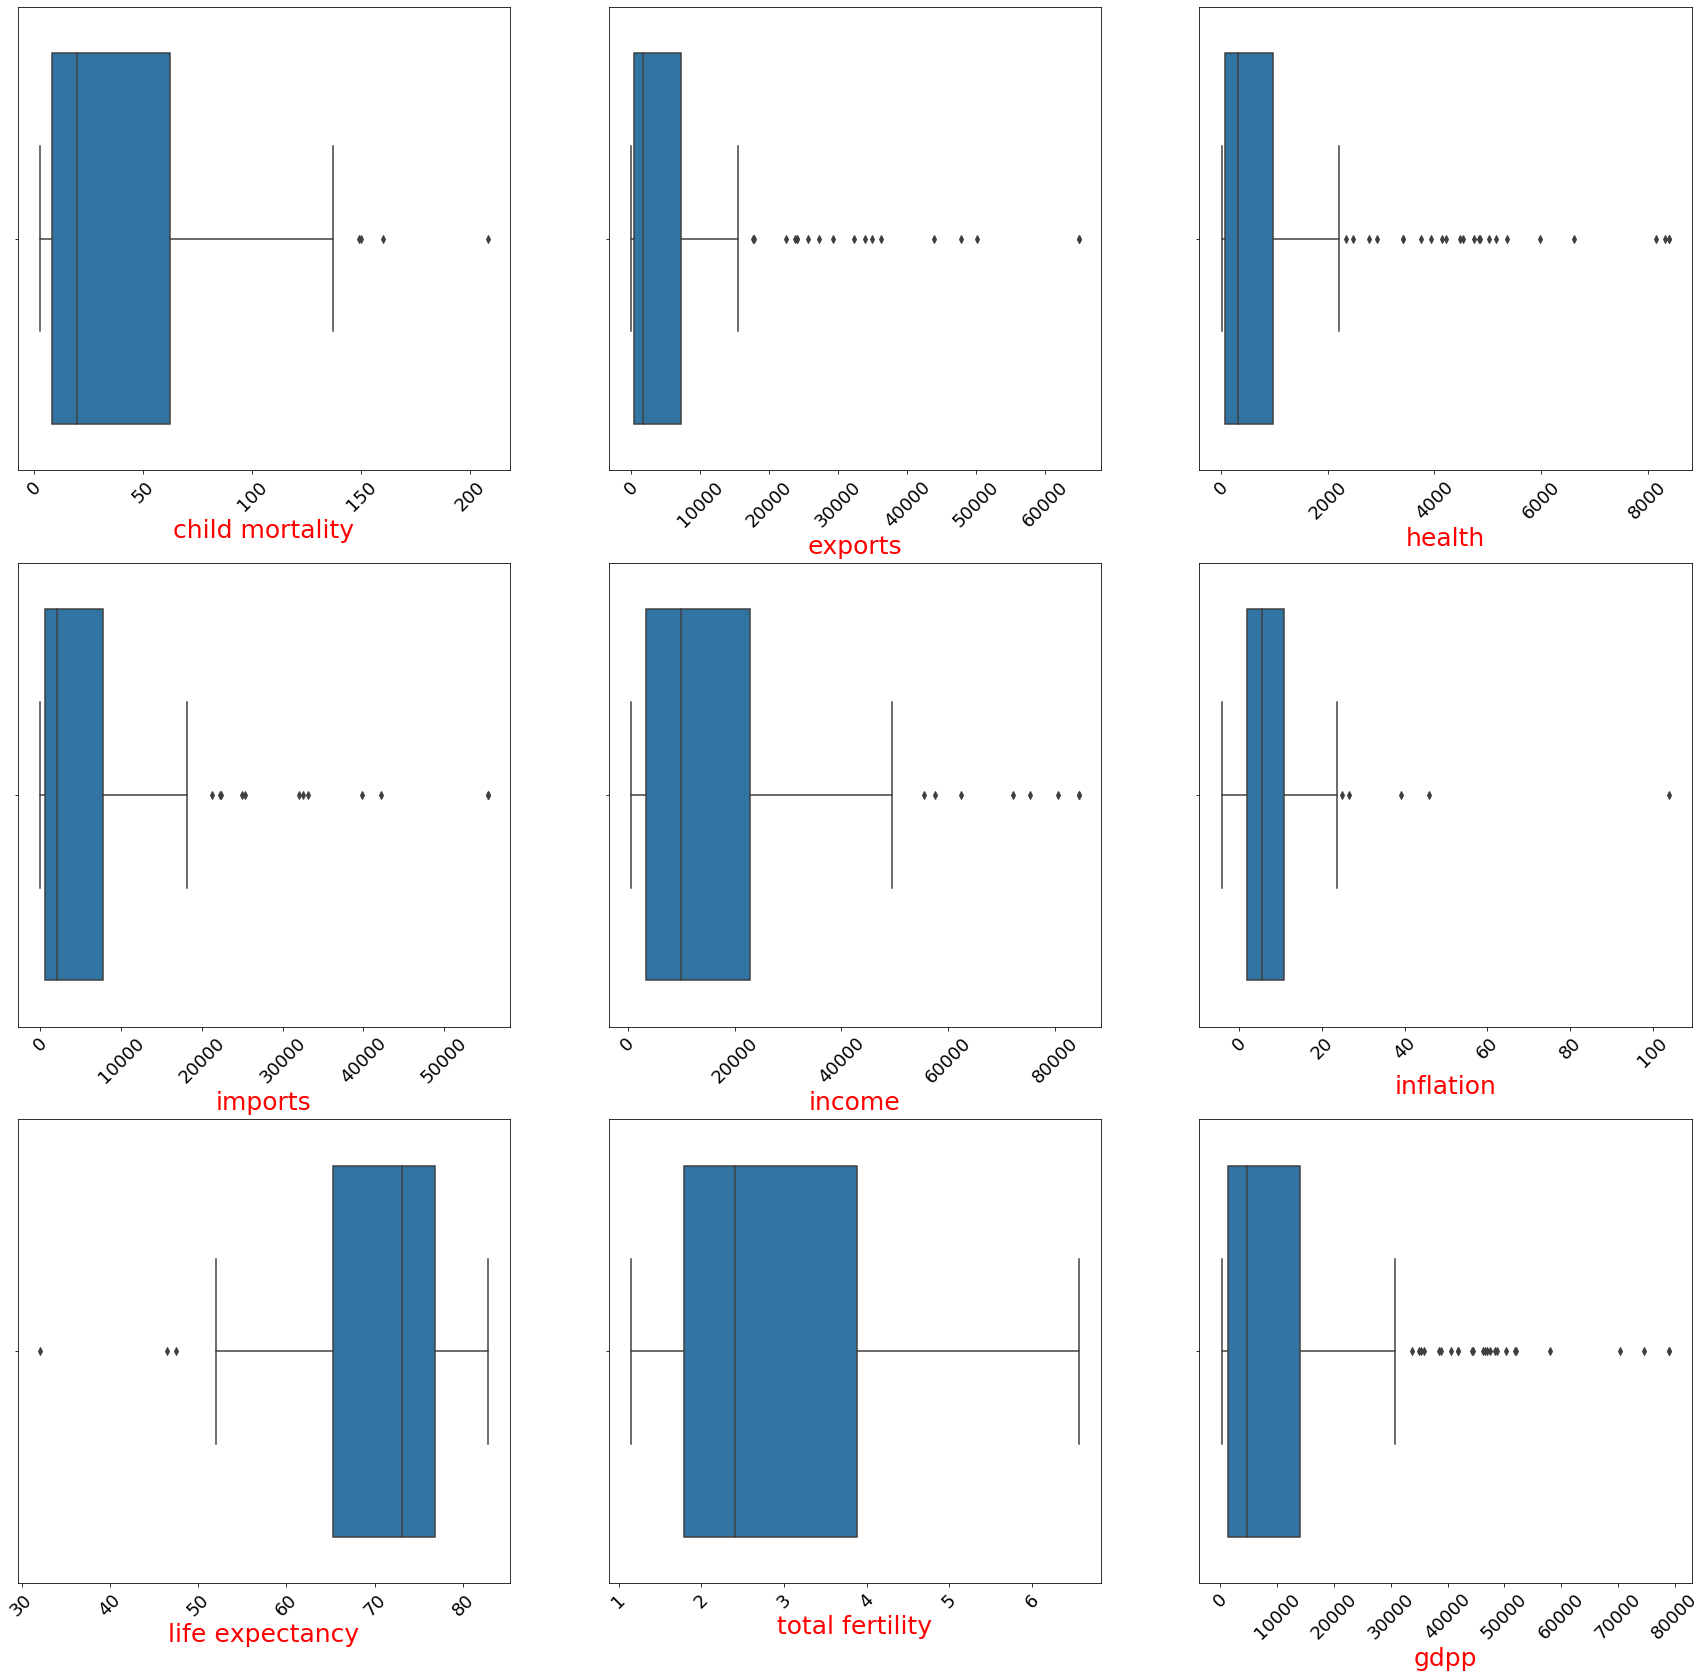

In [338]:
# Calling the custom box plot fucnction after outlier treatement to check the outliers

features_boxplot()

#### Inference:

- For outlier treatement we have performed soft capping ( basically capped the extreme outliers within 99% of the features value).


- After the outlier treatement we can see the there are still outliers present but we will ignore them beacuse as there are lot of outliers present for different features , hence these data points could form the cluster among them during clustering.


- **`Outlier Untreated:`** For the columns like `child mortality`, `inflation`, `life expectancy`, we can see that outliers exists above the upper whister (`95%` value).We will not **perform outlier treatement** on those columns as already mentioned because these are the columns which can be considered or features based on which a country can be consider for NGO aids.


- **`Outlier Treated:`** For rest of the columns like `imports`, `health`, `exports`, `income` etc., we can see that outliers exists above the upper whister (`95%` value). That means those countries do not need any aid. Hence, we will **perform outlier treatement** on those columns.

### Scalling the Dataset

In [339]:
# Creating neew data frame for clustering with the required columns

# Creating the new data frame using loc

country_cluster_df=country_df.loc[:,'child mortality':'gdpp']

# Checking the created dataframe top 5 rows

country_cluster_df.head()

,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [340]:
# Scalling the data before clustering 

# Storing the columns into a list for scalling

scale_feature=['child mortality','exports','health','imports','income','inflation','life expectancy','total fertility','gdpp']

# Initialize the StandardScaler class

scaler=StandardScaler()

# Scalling the features using fit_transform

country_cluster_df[scale_feature]=scaler.fit_transform(country_cluster_df[scale_feature])

In [341]:
# Checking the first 5 rows after scalling

country_cluster_df.head()

,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


## Perform Clustering

- Cluster Tendency Check
    - Check **Hopkins Statistics**

### Cluster Tendency

In [342]:
# Cluster tendency check using Hopkin statistic

# Import required library 

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
# Creating custom function for checking cluster tendency for Hopkins

def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
# sum of the distace from its nearest neighbour of actual dataset / sum of the distace from its nearest neighbour of actual dataset and random dataset 

# A value close to 1 tends to indicate the data is highly clustered

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

# Return the hopkins statistic
    return H

In [343]:
# Calling cumstom hopkins function for checking cluster tendency on dataset

# Cheking hopkin statistic for 5 iteration to see how the cluster tendy changed each time

for hopkin in range(0,5):

  # Printing the hopkin statistic for each iteration

  print(str(hopkin+1)+'. The Hopkin statistic is \033[1m' + str(hopkins(country_cluster_df))+'\033[0;0m')


1. The Hopkin statistic is 0.8876775580220317
2. The Hopkin statistic is 0.916761445164919
3. The Hopkin statistic is 0.9154163380834798
4. The Hopkin statistic is 0.8971386943792936
5. The Hopkin statistic is 0.8980592578419047


#### Inference:


- We have performed Hopkins check multiple times, to confirm that each time the Hopkins statistics value comes nearly 1. **A value close to 1, indicates the data is highly clustered.**


- In our case, as the Hopkins statistics values came close to 1 each time. It confirmed that our dataset is having **high clusterd tendency.**

### Perform K-Means Clustering

- Perform clustering using **K-Means**

    - Run K-Means and choose K using both `Elbow` and `Silhouette score`
    - Run K-Means with the chosen K
    - Visualize the clusters
    - Clustering profiling using `gdpp`, `child mortality` and `income` columns
    - Clustering profiling using **some socio-economic and health factors** like `health`, `imports`, `exports`, `inflation`
    -  **Country Identification:**  Based on the analysis, choose the countries that are in need for the aid.

#### Choose K cluster using  `Elbow` curve

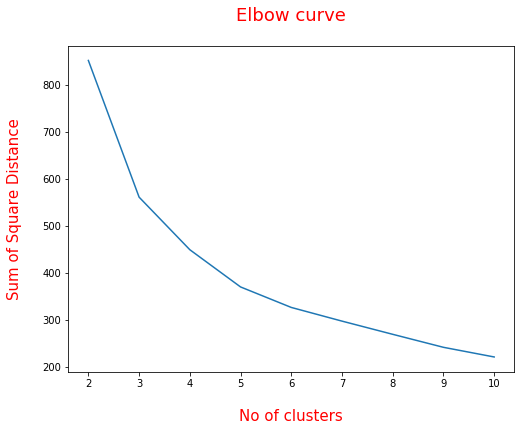

In [344]:
# Performing KMeans clustering 

# Ploting elbow curve and choose the optimal number of clusters

# Declaring a list for storing sum of square distance

ssd=[]

# List for storing number of clusters

clusters=[]

# Looping for different cluster for ploting the elbow curve

for cluster in range(2,11):

  # Initialize the KMeans  class

  kmean=KMeans(n_clusters=cluster,max_iter=60,random_state=0)

  # Using the fit method for KMeans clustering

  kmean.fit(country_cluster_df)

  # Storing the cost function into list

  ssd.append(kmean.inertia_)

  # Storing the number of cluster into list

  clusters.append(cluster)

# formating the elbow plot

plt.figure(figsize=(8,6))
plt.plot(clusters,ssd)
plt.xlabel('No of clusters',fontsize=15,color='red',labelpad=20)
plt.ylabel('Sum of Square Distance',fontsize=15,color='red',labelpad=20)
plt.title('Elbow curve',color='red',fontsize=18,pad=25)

# Showing the plot

plt.show()



#### Inference:


- Calculate the Within-Cluster-Sum of Squared Errors (ssd) for different values of k and choose the k for which ssd becomes first starts to diminish. So, the point where this distortion declines the most is the elbow point.


- From the above curve the **elbow point** will be at **k = 3**, because at that point, distortion declines the most.

#### Choose K cluster using  `Silhouette score`

- **silhouette score** = `(p−q)/ max(p,q)`
    - p is the mean distance to the points in the nearest cluster that the data point is not a part of
    - q is the mean intra-cluster distance to all the points in its own cluster.


- The value of the silhouette score range lies between -1 to 1.
    - A score closer to `1` indicates that the `data point is very similar to other data points` in the cluster
    - A score closer to `-1` indicates that the `data point is not similar to the data points` in its cluster.

The silhouette scores for cluster 2 is  0.4785537433954376
The silhouette scores for cluster 3 is  0.42330733362616313
The silhouette scores for cluster 4 is  0.4091396796207265
The silhouette scores for cluster 5 is  0.4155820343491549
The silhouette scores for cluster 6 is  0.3168594752023034
The silhouette scores for cluster 7 is  0.32207892145576
The silhouette scores for cluster 8 is  0.2610730768708743
The silhouette scores for cluster 9 is  0.30413758296141935
The silhouette scores for cluster 10 is  0.2958116533517011
---------------------------------------------------------------
 


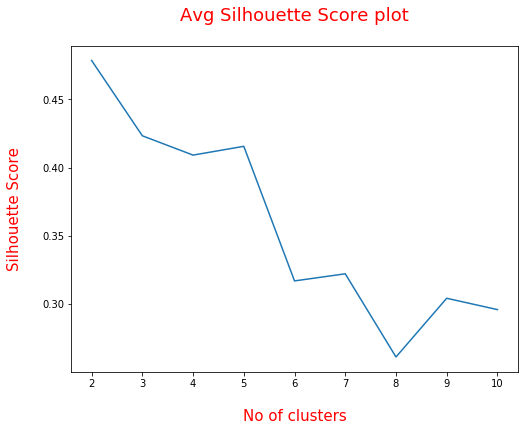

In [345]:
# Silhouette score analysis
# List for storing number of clusters

clusters=[]

# List for storing number of silhouette scores

silhouette_scores=[]

# Looping for different cluster for ploting the silhouette scores

for cluster in range(2,11):

  # Initialize the KMeans  class

  kmean=KMeans(n_clusters=cluster,max_iter=60,random_state=0)

  # Using the fit method for KMeans clustering

  kmean.fit(country_cluster_df)

  # Storing the cluster into list

  clusters.append(cluster)

  # Printing the silhouette scores

  print('The silhouette scores for cluster {0} is \033[1m {1}\033[0;0m'.format(cluster,silhouette_score(country_cluster_df,kmean.labels_)))

  # Storing the average silhouette scores into list

  silhouette_scores.append(silhouette_score(country_cluster_df,kmean.labels_))

# formating the plot

print('\033[1m'+'---------------------------------------------------------------')
print(' ')
plt.figure(figsize=(8,6))
plt.plot(clusters,silhouette_scores)
plt.xlabel('No of clusters',fontsize=15,color='red',labelpad=20)
plt.ylabel('Silhouette Score',fontsize=15,color='red',labelpad=20)
plt.title('Avg Silhouette Score plot',color='red',fontsize=18,pad=25)

# Showing the plot

plt.show()



#### Inference:

- We know that, a score closer to `1` indicates that the `data point is very similar to other data points` in the cluster. In our plot, the Silhouette score value is closer to 1, for K = 2. But for business, **K = 2** is not a good number of clusters to work on.


 - Hence, from `Silhouette score curve`, we will consider **K = 3** as the optimum cluster number.

#### Chosen K value:

- Considering both `Elbow curve and Silhouette score`, we observe that `optimal value of K can be 3`. Thus, **we will perform clustering with K = 3**

#### Run K-Means clustering with the chosen K (K = 3)

In [346]:
# perform KMeans clustering for K value 3

# Initialize the KMeans  class

kmean=KMeans(n_clusters=3,max_iter=60,random_state=0)

# Using the fit method for KMeans clustering

kmean.fit(country_cluster_df)

# Storing the cluster labels

cluster_label=kmean.labels_

# Print the differnt cluster labels

print(cluster_label)


[0 2 2 0 2 2 2 1 1 2 2 2 2 2 2 1 2 0 2 2 2 0 2 1 2 0 0 2 0 1 2 0 0 2 2 2 0
 0 0 2 0 2 1 2 1 2 2 2 2 0 0 2 2 1 1 0 0 2 1 0 2 2 2 0 0 2 0 2 1 2 2 2 0 1
 2 1 2 1 2 2 0 0 1 2 0 2 2 0 0 2 2 1 2 0 0 2 2 0 1 0 2 2 2 2 2 2 0 2 0 2 1
 1 0 0 1 2 0 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 0 1 2 2 0 0 2 2 2 2 0 2 1 1 2 0
 2 0 0 2 2 2 2 0 2 1 1 1 2 2 2 2 2 0 0]


In [347]:

# Adding the new columns in original dataframe and assigning new cluster label

country_df['cluster label']=cluster_label

#Checking the first 5 rows of the dataframe

country_df.head()


,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp,cluster label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


#### Check Data Distribution among Clusters

In [348]:
# Now checking the data distribution among different cluster labels

# creating the custom function for verifying the cluster distribution

# Defining the custom function

def cluster_distribution (cluster_dataframe):
    
    cluster_distribute=cluster_dataframe['cluster label'].value_counts(normalize=True)*100

# Formating the pie plot

    plt.figure(figsize=(15,8))

    plt.title("Distribution of data in clusters",color='red',fontsize=15)

# Ploting the pie plot

    plt.pie(cluster_distribute,labels=cluster_distribute.index,autopct='%1.2f%%',colors=['green','red','blue'])

# Showing the pie plot

    plt.show()

# Printing the counts of data distibution for different clusters

    print('\033[1m'+'---------------------------------------------')
    print(cluster_dataframe['cluster label'].value_counts())
    print('\033[1m'+'---------------------------------------------')

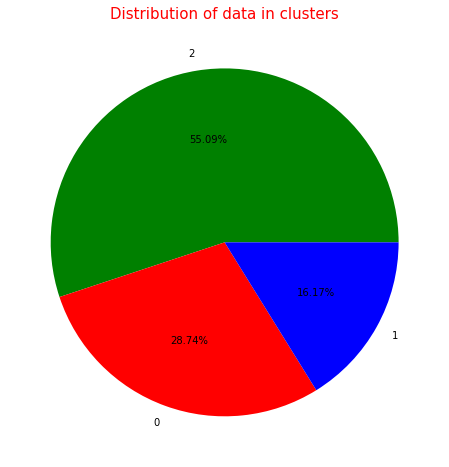

---------------------------------------------
2    92
0    48
1    27
Name: cluster label, dtype: int64
---------------------------------------------


In [349]:
# Calling the custom function for checking the cluster distribution

cluster_distribution(country_df)

- `Data distribution seems goods among three clusters`. Hence, we can proceed with visualization and Cluster profiling.

#### Visualize the clusters

- Plotting the cluster with respect to the data columns

    - Child Mortality
    - GDPP
    - Income

In [350]:
# Custom function for Visualize the different clusters

def visualize_cluster(x_col,y_col):

  # Setting the figure size

    plt.figure(figsize=(8,6))

  # Plotting the scatterplot

    sns.scatterplot(country_df[x_col],country_df[y_col],hue=country_df['cluster label'],palette='Dark2',s=100)

  # formating the scatterplot

    plt.xlabel(x_col.title(),fontsize=15,color='red',labelpad=20)
    plt.ylabel(y_col.title(),fontsize=15,color='red',labelpad=20)
    plt.title('Cluster Visualization for '+x_col.title()+' vs '+y_col.title(),color='red',fontsize=18,pad=25)

  # Showing the plot

    plt.show()

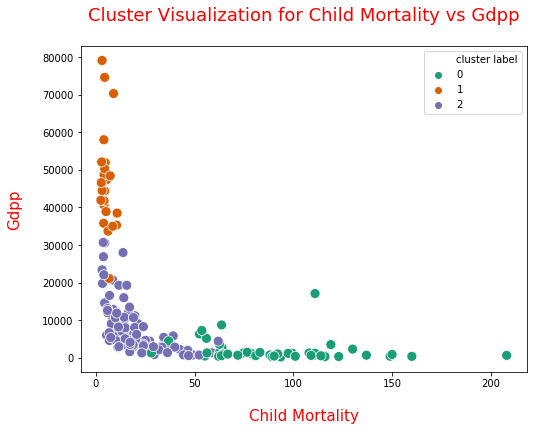

In [351]:
# Calling the custom visualize function for clusters for child mortality vs gdpp

visualize_cluster('child mortality','gdpp')

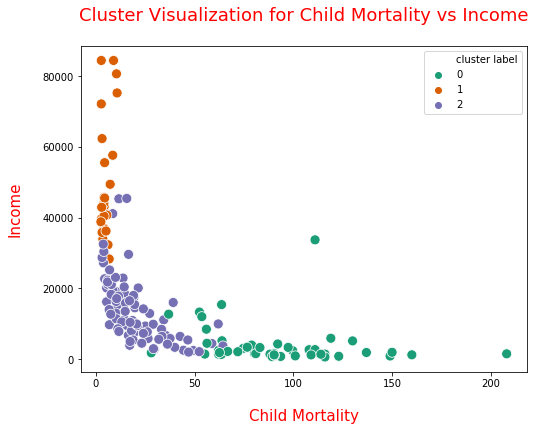

In [352]:
# Calling the custom visualize function for clusters for child mortality vs income

visualize_cluster('child mortality','income')

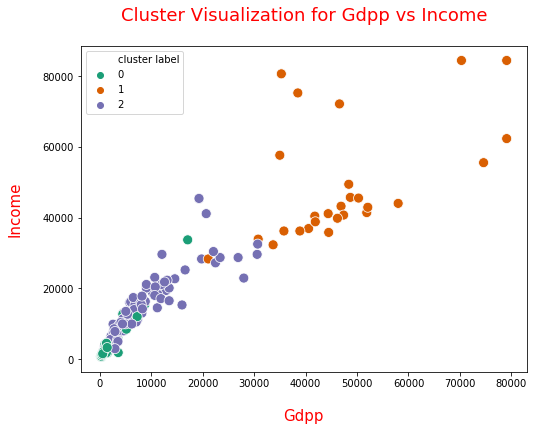

In [353]:
# Calling the custom visualize function for clusters for child mortality vs income

visualize_cluster('gdpp','income')

#### Cluster profiling


- Analyse the clusters by comparing how below three variables vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of **under-developed countries.**

    - Child Mortality
    - GDPP
    - Income

In [354]:
# Cluster profiling

# Custom function for finding the average of some features columns group by clusters

# Defining the funciton body 

def cluster_mean(cluster_list):

  # Returning the mean of features
    
    return country_df.groupby('cluster label')[cluster_list].mean()


In [355]:
# calling the custom function for finding the average of child mortality,income,gdpp columns group by clusters

cluster_mean(['child mortality','income','gdpp'])

,child mortality,income,gdpp
cluster label,,,
0,91.610417,3897.354167,1909.208333
1,5.092593,49057.333333,47476.888889
2,20.177174,14169.456522,8226.869565


In [356]:
# Plotting the average of child mortality,income,gdpp columns group by clusters in barplot

# Custom function for Plotting the average of features group by clusters in barplot

# Defining the function body

def cluster_mean_plot (cluster_feature_list):

  # Ploting the bar plot of the features mean

    country_df.groupby('cluster label')[cluster_feature_list].mean().plot(kind='bar',figsize=(8,5))

# Scalng the y scale in logs

    plt.yscale('log')

# formating the bar plot

    plt.xlabel('Cluster label',fontsize=15,color='red',labelpad=20)
    plt.ylabel('Average scale (log)',fontsize=15,color='red',labelpad=20)
    plt.title('Mean value of features for different clusters' ,color='red',fontsize=18,pad=25)

# Showing the plot

    plt.show()

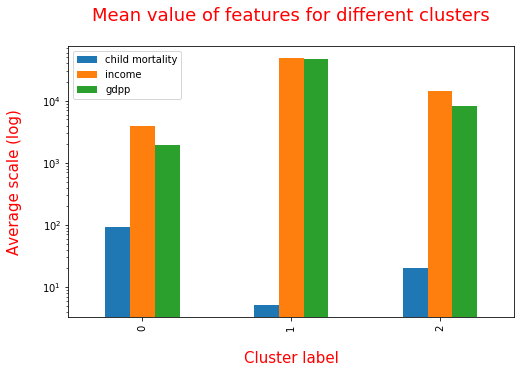

In [357]:
# Calling the Custom function for Plotting the average of 'child mortality','income','gdpp' features group by clusters in barplot

cluster_mean_plot(['child mortality','income','gdpp'])

In [358]:
# analyzing clusters for different features

# Defining the custom funciton for ploting the box plot for different features for different clusters

def cluster_features_boxplot(cluster_featrs_list,n_rows,n_cols):

# Formatting figure size

  plt.figure(figsize=(35,18))

# Ploting subplots for analyzing clusters for different features

# looping through features

  for columns in enumerate(cluster_featrs_list):

  # Initialize the subplots

    plt.subplot(n_rows,n_cols,columns[0]+1)

  # Ploting box plots

    sns.boxplot(data=country_df,x='cluster label',y=columns[1])

  # Formating the plots

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Cluster Label',fontsize=22,color='red',labelpad=15)
    plt.ylabel(columns[1],fontsize=22,color='red',labelpad=12)

# Showing the box plots

  plt.show()

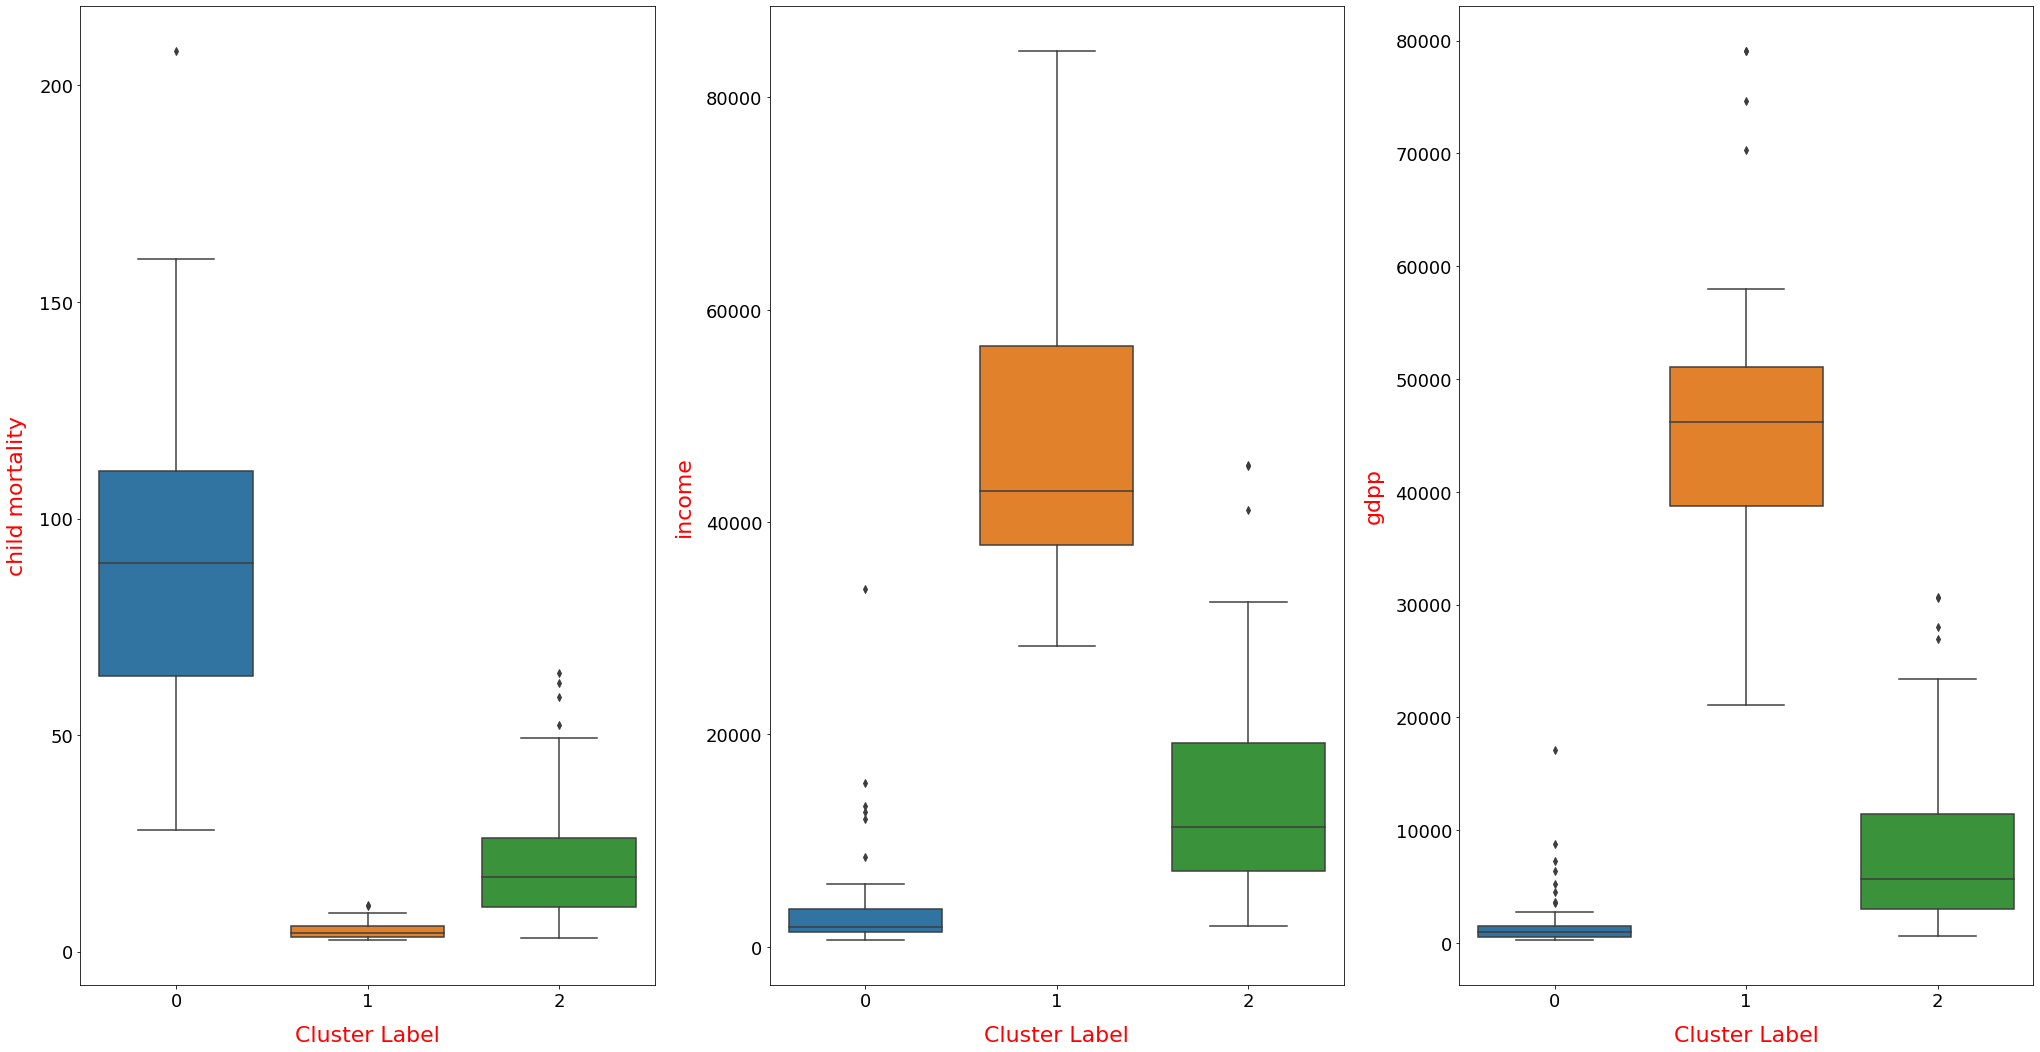

In [359]:
# Calling the custom funciton for ploing the box plot and analyzing features 'child mortality','income','gdpp' for different clusters

cluster_features_boxplot(['child mortality','income','gdpp'],1,3)

#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low GDPP`, `Low Income` and `High Child Mortality rate`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `GDPP`, `Income` and `Child Mortality rate` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High GDPP`, `High Income` and `Low Child Mortality rate`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification

- Based on the analysis, finding the `top-10 countries` that are actually in the requirement of the AID

    - Identified countries based on below features
        - Low **GDPP**
        - Low **Income** 
        - High **Child Mortality rate**

In [360]:
# Country identification based on cluster 0 for features 'gdpp','child mortality','income'

# Creating new dataframe for underdeveloped countries for cluster 0 

country_df_cluster_0=country_df[country_df['cluster label']==0]

# sorting the data frame based on selected features 'gdpp','child mortality','income' and retport the same

country_df_cluster_0.sort_values(by=['gdpp','child mortality','income'],ascending=[True,False,True],inplace=True)

# Reset the index

country_df_cluster_0.reset_index(drop=True,inplace=True)

# Display the top 10 countries who are need of aids

country_df_cluster_0[['country','gdpp','child mortality','income']].head(10)

,country,gdpp,child mortality,income
0,Burundi,231.0,93.6,764.0
1,Liberia,327.0,89.3,700.0
2,"Congo, Dem. Rep.",334.0,116.0,609.0
3,Niger,348.0,123.0,814.0
4,Sierra Leone,399.0,160.0,1220.0
5,Madagascar,413.0,62.2,1390.0
6,Mozambique,419.0,101.0,918.0
7,Central African Republic,446.0,149.0,888.0
8,Malawi,459.0,90.5,1030.0
9,Eritrea,482.0,55.2,1420.0


#### Inference:

Top 10 Country Identified based on **gdpp, child mortality and income** features using `K-Means` clustering


**1.** Burundi

**2.** Liberia

**3.** Congo, Dem. Rep.

**4.** Niger

**5.** Sierra Leone

**6.** Madagascar

**7.** Mozambique

**8.** Central African Republic

**9.** Malawi

**10.** Eritrea

#### Cluster profiling : Based on socio-economic and health factors

- Cluster profiling based on some **socio-economic and health factors**
    - Health
    - Imports
    - Exports
    - Inflation

In [361]:
# calling the custom function for finding the average of exports,imports,inflation,health columns group by clusters

cluster_mean(['exports','imports','inflation','health'])

,exports,imports,inflation,health
cluster label,,,,
0,879.063521,827.028771,11.911146,114.821765
1,26440.026667,22045.851111,3.120407,4363.327807
2,3650.066288,3759.545881,6.995435,573.165330


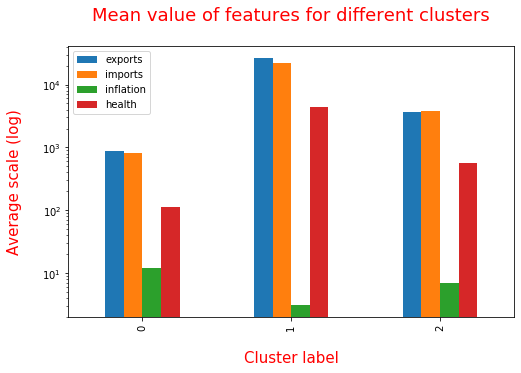

In [362]:
# Calling the Custom function for Plotting the average of exports,imports,inflation,health columns group by clusters in barplot

cluster_mean_plot(['exports','imports','inflation','health'])

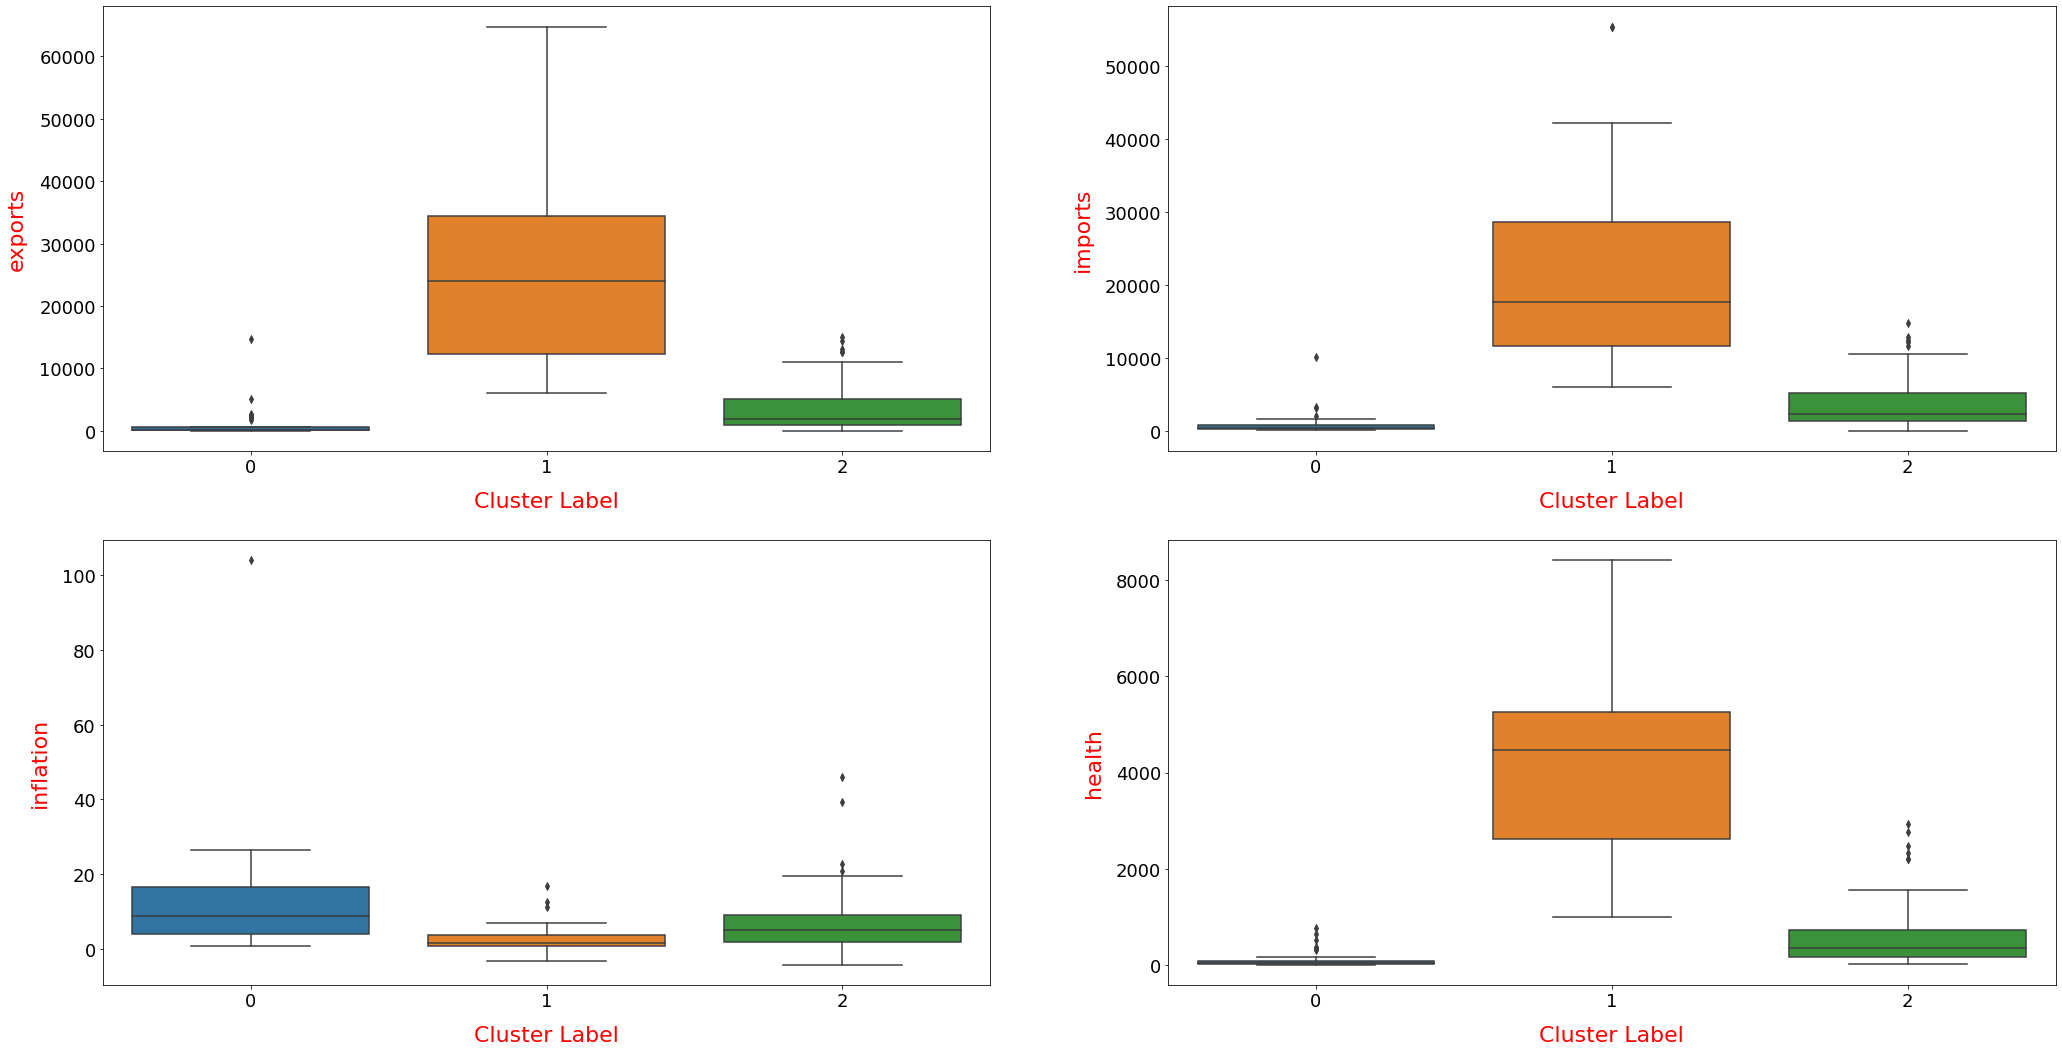

In [363]:
# Calling the custom funciton for ploing the box plot and analyzing features exports,imports,inflation,health  for different clusters

cluster_features_boxplot(['exports','imports','inflation','health'],2,2)

#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low Health spent`, `Low Imports of goods and services`, `Low Exports of goods and services` and `High Inflation`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `Health spent`, `Imports of goods and services`, `Exports of goods and services` and `Inflation` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High Health spent`, `High Imports and Exports of goods and services` and `Low Inflation`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification : Based on some socio-economic and health factors

- Finding the `top-10 countries` that are actually in the requirement of the AID based on some socio-economic and health factors.

    - Identified countries based on below features
        - Low **Health spent**
        - Low **Imports of goods and services**
        - Low **Exports of goods and services**
        - High **Inflation**

In [364]:
# Country identification based on cluster 0 for features 'exports','imports','inflation','health'

# Creating new dataframe for underdeveloped countries for cluster 0 

country_df_cluster_socio_0=country_df[country_df['cluster label']==0]

# sorting the data frame based on selected features 'exports','imports','inflation','health' and retport the same

country_df_cluster_socio_0.sort_values(by=['exports','imports','inflation','health'],ascending=[True,True,False,True],inplace=True)

# Reset the index

country_df_cluster_socio_0.reset_index(drop=True,inplace=True)

# Display the top 10 countries who are need of aids

country_df_cluster_socio_0[['country','exports','imports','inflation','health']].head(10)

,country,exports,imports,inflation,health
0,Burundi,20.6052,90.552,12.30,26.7960
1,Eritrea,23.0878,112.306,11.60,12.8212
2,Central African Republic,52.6280,118.190,2.01,17.7508
3,Afghanistan,55.3000,248.297,9.44,41.9174
4,Liberia,62.4570,302.802,5.47,38.5860
5,Sierra Leone,67.0320,137.655,17.20,52.2690
6,Rwanda,67.5600,168.900,2.61,59.1150
7,Niger,77.2560,170.868,2.55,17.9568
8,Timor-Leste,79.2000,1000.800,26.50,328.3200
9,Guinea-Bissau,81.5030,192.544,2.97,46.4950


#### Inference:

Top 10 Country Identified based on **exports, imports, inflation and health** features using `K-Means` clustering


**1.** Burundi
	   
**2.** Eritrea
	   
**3.** Central African Republic
	   
**4.** Afghanistan
	   
**5.** Liberia
	   
**6.** Sierra Leone
	   
**7.** Rwanda
	   
**8.** Niger
	   
**9.** Timor-Leste
	   
**10.** Guinea-Bissau

### Perform Hierarchical Clustering

- Perform clustering using **Hierarchical Clustering**
    - Use both Single and Complete linkage
    - Choose one method based on the results
    - Visualise the clusters
    - Clustering profiling using `gdpp`, `child mortality` and `income` columns
    - Clustering profiling using **some socio-economic and health factors** like `health`, `imports`, `exports`, `inflation`
    - **Country Identification:** Choose the countries based on some socio-economic and health factors.

In [365]:
# Checking the original country dataframe before hieirarchical clustering

country_df.head()

,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp,cluster label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [366]:
# Checking the original country cluster datafrmae on which scalling was done earlier before hieirarchical clustering

country_cluster_df.head()

,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


### Use Single and Complete linkage

In [367]:
# perform heirarchical clustering with sigle linkage

# defining custom function for dendrogram plot

def linkage_matrix(cluster_linkage):

  # Setting the figure size

  plt.figure(figsize=(15,8))

# Setting the tile of the plot

  plt.title('Dendrogram with '+cluster_linkage+' linkage',color='red',fontsize='18',pad=15)

# Perform heirarchical clustering with single linkage

  merge_cluster_heirarchy=linkage(country_cluster_df,method=cluster_linkage,metric='euclidean')

# Returing the linkage matrix

  return merge_cluster_heirarchy

#### Plotting dendrogram using `single linkage`

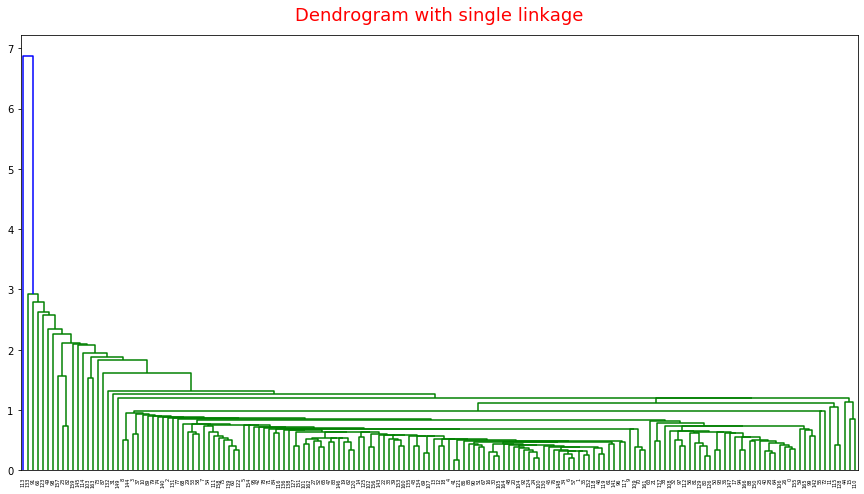

In [368]:
# calling the custom function and ploting the dendrogram using single linkage

merge_cluster_single=linkage_matrix('single')

# ploting the dendrogram

dendrogram(merge_cluster_single)

# showing the plot

plt.show()

#### Plotting dendrogram using `Complete linkage`

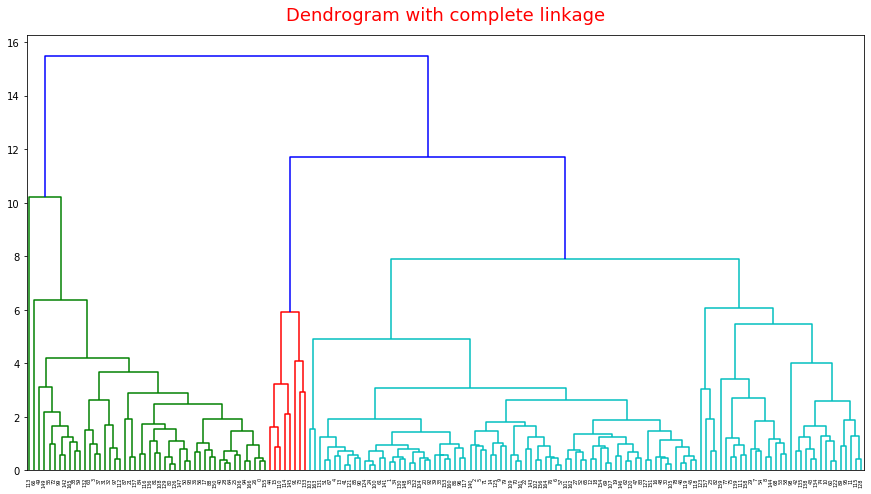

In [369]:
# calling the custom function and ploting the dendrogram using complete linkage

merge_cluster_complete=linkage_matrix('complete')

# ploting the dendrogram

dendrogram(merge_cluster_complete)

# showing the plot

plt.show()

#### Inference:

- From the above Dendrograms, it is evident that **`'Complete Linkage'`** give a better cluster formation. So we will use `Complete linkage` output for our further analysis.  

#### Assigning Heirarchical cluster label using K=3

In [370]:
# returning the cluster label by passing the clusters =3

cluster_label_heirarchy=cut_tree(merge_cluster_complete,n_clusters=3).reshape(-1,)

# Printing the cluster labels

print(cluster_label_heirarchy)

[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 2 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 2
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 2
 1 0 0 2 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 2 1 1 0 0 1 1 1 1 0 1 1 2 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]


In [371]:
# Removing the cluster label that is performed by kmeans clustering and store it in to original dataframe

country_df=country_df.loc[:,'country':'gdpp']

# assignning the cluster label that is found from hierarchical clustering

country_df['cluster label']=cluster_label_heirarchy

# checking the country dataframe after heirarchical clustering

country_df.head()

,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp,cluster label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


#### Check Data Distribution among Clusters

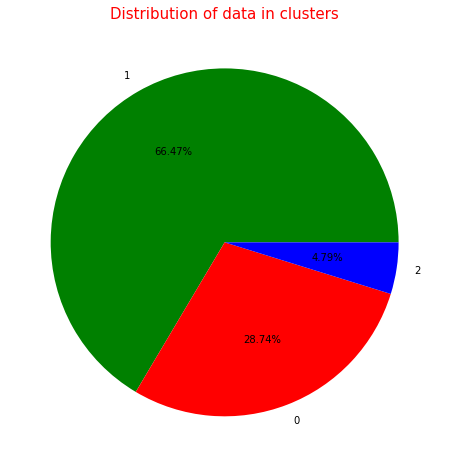

---------------------------------------------
1    111
0     48
2      8
Name: cluster label, dtype: int64
---------------------------------------------


In [372]:
# Calling the custom function to see the cluster distribution for various country

cluster_distribution(country_df)

- `Data distribution seems goods among three clusters`. Hence, we can proceed with visualization and Cluster profiling

#### Hierarchical Clustering: Visualize the clusters

- Plotting the cluster with respect to the data columns

    - Child Mortality
    - GDPP
    - Income

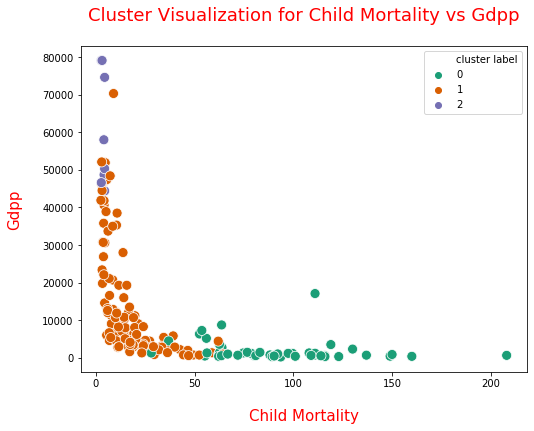

In [373]:
# Calling the custom function to visualize the clusters for child mortality vs gdpp

visualize_cluster('child mortality','gdpp')

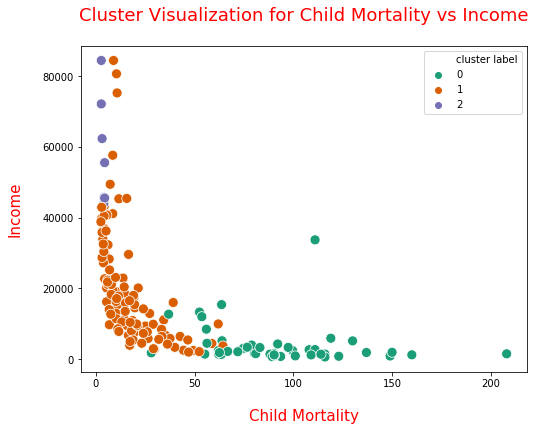

In [374]:
# Calling the custom visualize function for clusters for child mortality vs income

visualize_cluster('child mortality','income')

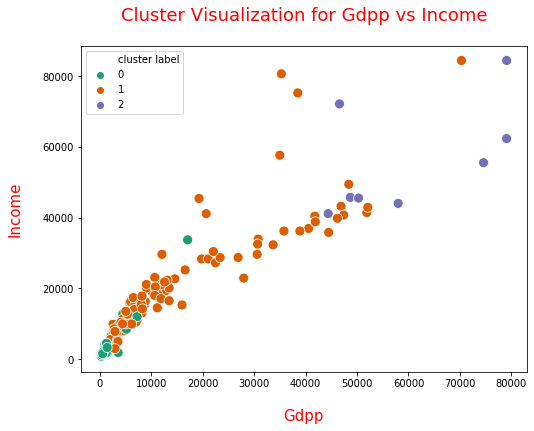

In [375]:
# Calling the custom visualize function for clusters for child mortality vs income

visualize_cluster('gdpp','income')

#### Cluster profiling


- Analyse the clusters by comparing how below three variables vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of **under-developed countries.**

    - Child Mortality
    - GDPP
    - Income

In [376]:
# calling the custom function for finding the average of child mortality,income,gdpp columns group by clusters

cluster_mean(['child mortality','income','gdpp'])

,child mortality,income,gdpp
cluster label,,,
0,91.610417,3897.354167,1909.208333
1,17.686486,19617.693694,14035.783784
2,3.825000,56321.750000,60097.000000


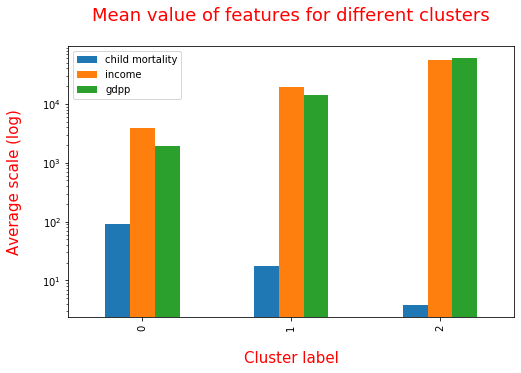

In [377]:
# Calling the Custom function for Plotting the average of 'child mortality','income','gdpp' features group by clusters in barplot

cluster_mean_plot(['child mortality','income','gdpp'])

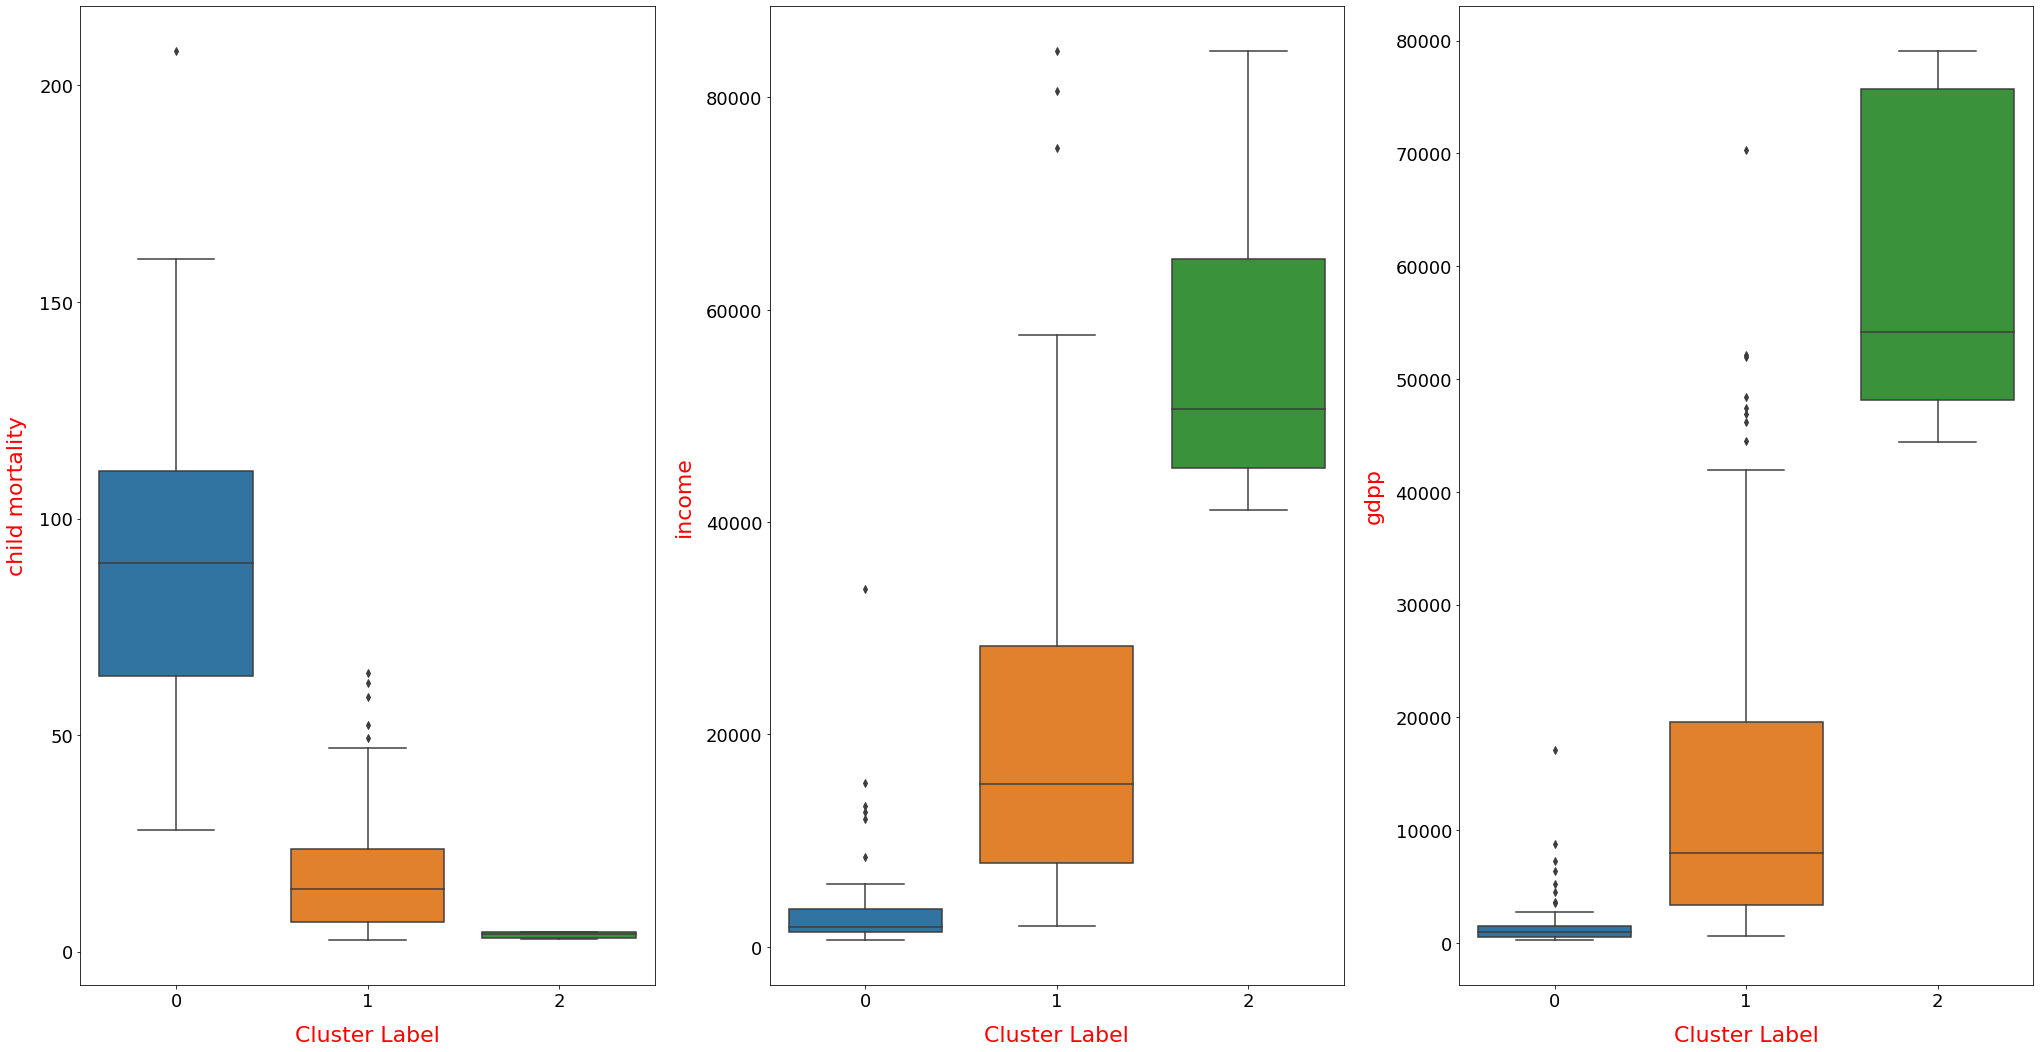

In [378]:
# Calling the custom funciton for ploing the box plot and analyzing features 'child mortality','income','gdpp' for different clusters

cluster_features_boxplot(['child mortality','income','gdpp'],1,3)

#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low GDPP`, `Low Income` and `High Child Mortality rate`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `GDPP`, `Income` and `Child Mortality rate` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High GDPP`, `High Income` and `Low Child Mortality rate`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification

- Based on the analysis, finding the `top-10 countries` that are actually in the requirement of the AID

    - Identified countries based on below features
        - Low **GDPP**
        - Low **Income** 
        - High **Child Mortality rate**

In [379]:
# Country identification based on cluster 0 for features 'gdpp','child mortality','income'

# Creating new dataframe for underdeveloped countries for cluster 0 

country_df_cluster_hierarchy_0=country_df[country_df['cluster label']==0]

# sorting the data frame based on selected features 'gdpp','child mortality','income' and retport the same

country_df_cluster_hierarchy_0.sort_values(by=['gdpp','child mortality','income'],ascending=[True,False,True],inplace=True)

# Reset the index

country_df_cluster_hierarchy_0.reset_index(drop=True,inplace=True)

# Display the top 10 countries who are need of aids

country_df_cluster_hierarchy_0[['country','gdpp','child mortality','income']].head(10)

,country,gdpp,child mortality,income
0,Burundi,231.0,93.6,764.0
1,Liberia,327.0,89.3,700.0
2,"Congo, Dem. Rep.",334.0,116.0,609.0
3,Niger,348.0,123.0,814.0
4,Sierra Leone,399.0,160.0,1220.0
5,Madagascar,413.0,62.2,1390.0
6,Mozambique,419.0,101.0,918.0
7,Central African Republic,446.0,149.0,888.0
8,Malawi,459.0,90.5,1030.0
9,Eritrea,482.0,55.2,1420.0


#### Inference:

Top 10 Country Identified based on **gdpp, child mortality and income** features using `Hierarchical` clustering


**1.** Burundi

**2.** Liberia

**3.** Congo, Dem. Rep.

**4.** Niger

**5.** Sierra Leone

**6.** Madagascar

**7.** Mozambique

**8.** Central African Republic

**9.** Malawi

**10.** Eritrea

#### Cluster profiling : Based on socio-economic and health factors

- Cluster profiling based on some **socio-economic and health factors**
    - Health
    - Imports
    - Exports
    - Inflation

In [380]:
# calling the custom function for finding the average of exports,imports,inflation,health columns group by clusters

cluster_mean(['exports','imports','inflation','health'])

,exports,imports,inflation,health
cluster label,,,,
0,879.063521,827.028771,11.911146,114.821765
1,6197.379266,5702.860550,6.443802,1098.913521
2,45222.215000,38512.335000,1.571125,6070.207550


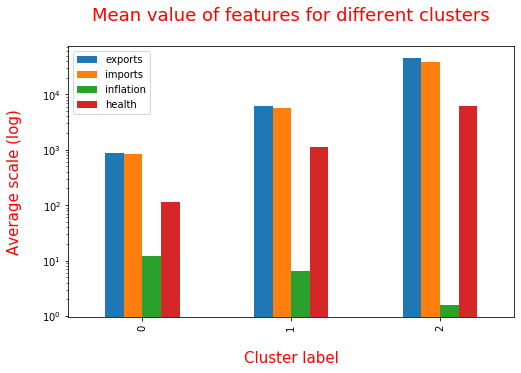

In [381]:
# Calling the Custom function for Plotting the average of exports,imports,inflation,health columns group by clusters in barplot

cluster_mean_plot(['exports','imports','inflation','health'])

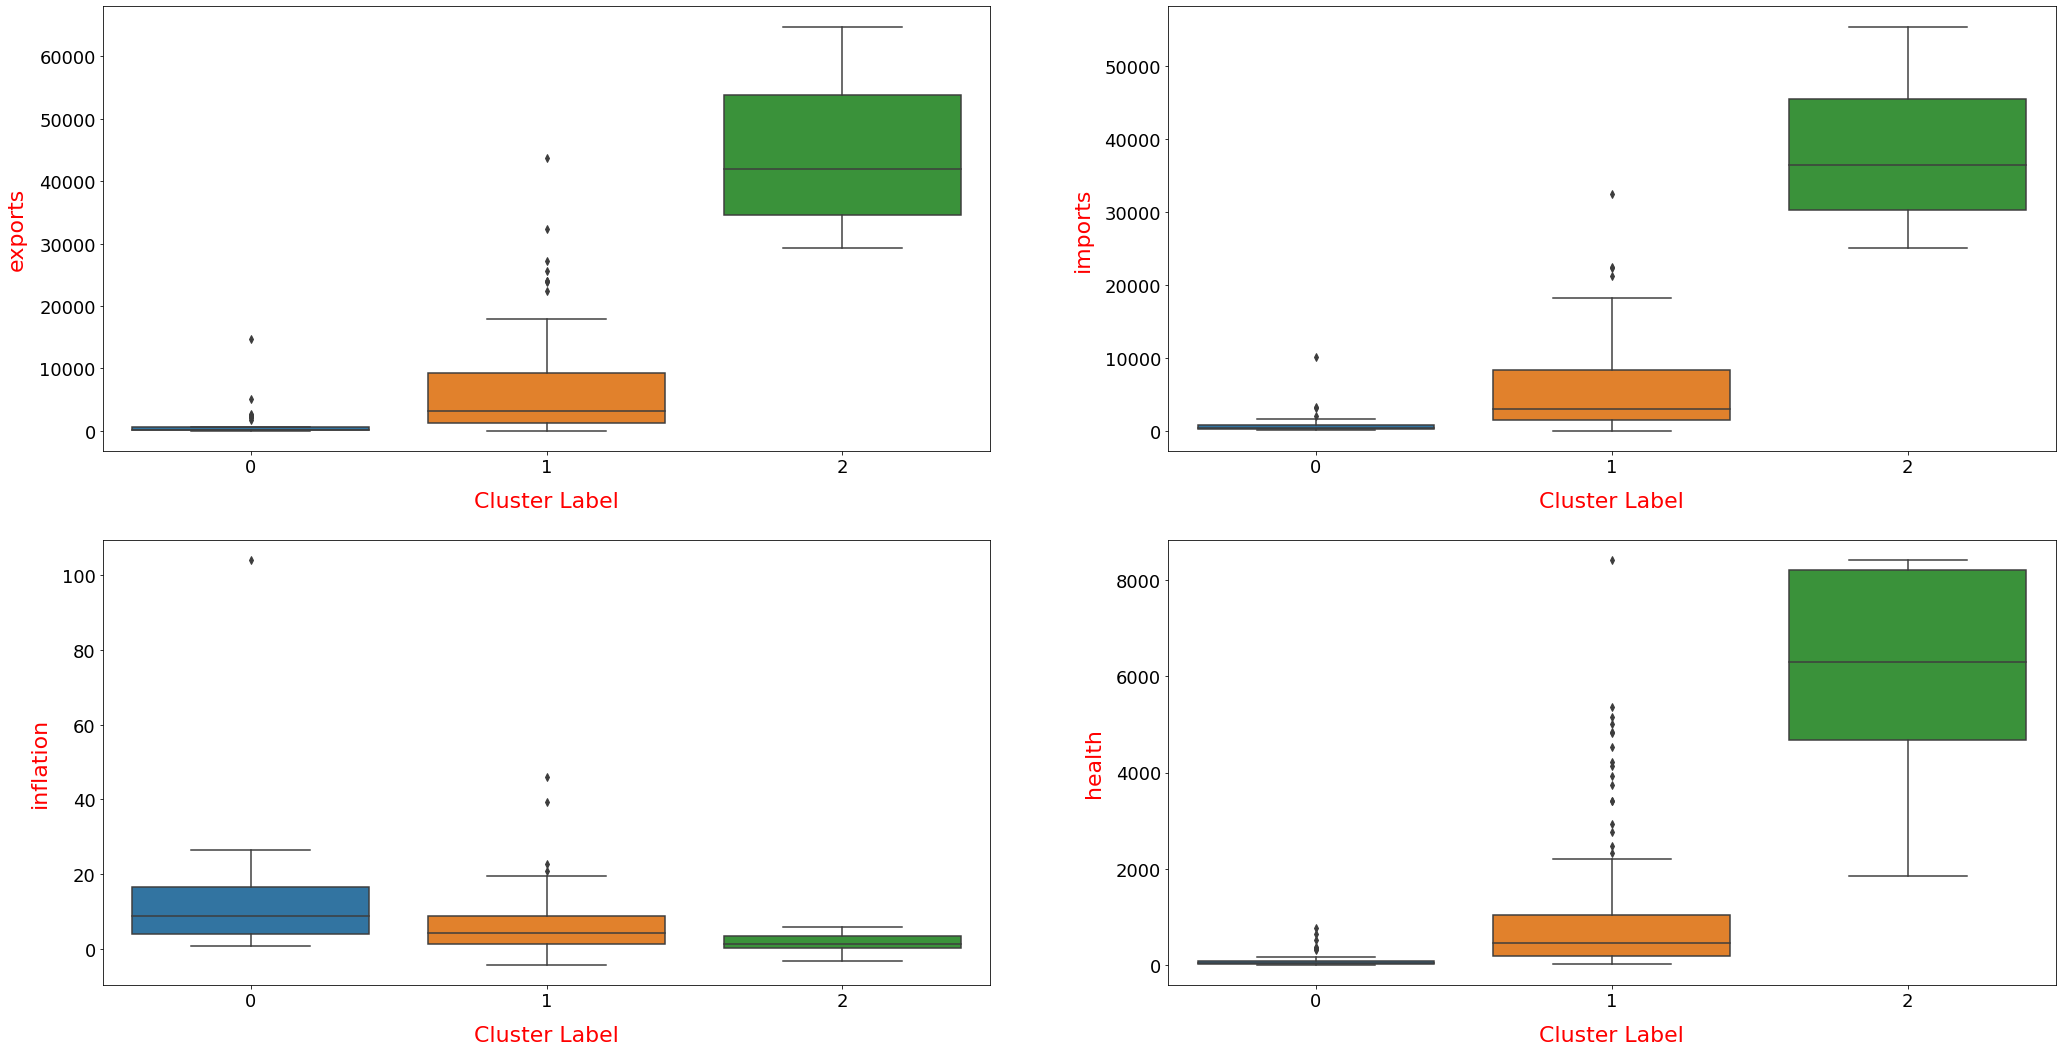

In [382]:
# Calling the custom funciton for ploing the box plot and analyzing features exports,imports,inflation,health  for different clusters

cluster_features_boxplot(['exports','imports','inflation','health'],2,2)

#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low Health spent`, `Low Imports of goods and services`, `Low Exports of goods and services` and `High Inflation`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `Health spent`, `Imports of goods and services`, `Exports of goods and services` and `Inflation` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High Health spent`, `High Imports and Exports of goods and services` and `Low Inflation`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification : Based on some socio-economic and health factors

- Finding the `top-10 countries` that are actually in the requirement of the AID based on **some socio-economic and health factors.**

    - Identified countries based on below features
        - Low **Health spent**
        - Low **Imports of goods and services**
        - Low **Exports of goods and services**
        - High **Inflation**


In [383]:
# Country identification based on cluster 0 for features 'exports','imports','inflation','health'

# Creating new dataframe for underdeveloped countries for cluster 0 

country_df_cluster_hei_socio_0=country_df[country_df['cluster label']==0]

# sorting the data frame based on selected features 'exports','imports','inflation','health' and retport the same

country_df_cluster_hei_socio_0.sort_values(by=['exports','imports','inflation','health'],ascending=[True,True,False,True],inplace=True)

# Reset the index

country_df_cluster_hei_socio_0.reset_index(drop=True,inplace=True)

# Display the top 10 countries who are need of aids

country_df_cluster_hei_socio_0[['country','exports','imports','inflation','health']].head(10)

,country,exports,imports,inflation,health
0,Burundi,20.6052,90.552,12.30,26.7960
1,Eritrea,23.0878,112.306,11.60,12.8212
2,Central African Republic,52.6280,118.190,2.01,17.7508
3,Afghanistan,55.3000,248.297,9.44,41.9174
4,Liberia,62.4570,302.802,5.47,38.5860
5,Sierra Leone,67.0320,137.655,17.20,52.2690
6,Rwanda,67.5600,168.900,2.61,59.1150
7,Niger,77.2560,170.868,2.55,17.9568
8,Timor-Leste,79.2000,1000.800,26.50,328.3200
9,Guinea-Bissau,81.5030,192.544,2.97,46.4950


#### Inference:

Top 10 Country Identified based on **exports, imports, inflation and health** features using `Hierarchical` clustering


**1.** Burundi
	   
**2.** Eritrea
	   
**3.** Central African Republic
	   
**4.** Afghanistan
	   
**5.** Liberia
	   
**6.** Sierra Leone
	   
**7.** Rwanda
	   
**8.** Niger
	   
**9.** Timor-Leste
	   
**10.** Guinea-Bissau

# Conclusion

Top 10 Countries identified for NGO AID, which are **Under developed** countries, based on **gdpp, child mortality and income** features using both `K-Means` and `Hierarchical` clustering are as follows:


**1.** Burundi

**2.** Liberia

**3.** Congo, Dem. Rep.

**4.** Niger

**5.** Sierra Leone

**6.** Madagascar

**7.** Mozambique

**8.** Central African Republic

**9.** Malawi

**10.** Eritrea


**Reasons for AID for the above country:**
   - High `Child Mortality`
   - Low `GDPP`
   - Low `Income`

Top 10 countries identified for NGO AID, which are **Under developed** countries, based on other **socio-economic factors** like **exports, imports, inflation and health** etc. features using both `K-Means` and `Hierarchical` clustering are as follows:


**1.** Burundi
	   
**2.** Eritrea
	   
**3.** Central African Republic
	   
**4.** Afghanistan
	   
**5.** Liberia
	   
**6.** Sierra Leone
	   
**7.** Rwanda
	   
**8.** Niger
	   
**9.** Timor-Leste
	   
**10.** Guinea-Bissau

**Reasons for AID for the above country:**
   - High `Inflation`
   - Low `Exports and Imports of goods and services`
   - Low `spent on health`

If we considered **all features, including socio-economic factors**, then below are the list of 6 **Under Developed** countries that needs to be considered for NGO AID.



**1.** Burundi

**2.** Liberia

**3.** Niger

**4.** Central African Republic

**5.** Sierra Leone

**6.** Eritrea
